In [1]:
import numpy as np
from astropy.table import Table
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_color_codes()

### Read in bow shock data from Kobulnicky:2017a

In [2]:
tab01 = Table.read("data/Kobulnicky2017/J_AJ_154_201_table1.dat.fits")

Remove coordinate columns that we do not want. Also the color temperatures. *And we have to remove the Name field*. This is because of inconsitencies between the names in the different tables, which cause problems when we merge.

In [3]:
tab01.remove_columns(
   [
       'RAh', 'RAm', 'RAs', 'DE-', 'DEd', 'DEm', 'DEs',
       'T70/160', 'Name',
   ]
)

In [4]:
tab01[300:310]

ID,Rad,Height,l_F3.6,F3.6,l_F4.5,F4.5,l_F5.8,F5.8,l_F8.0,F8.0,F24,l_F70,F70,l_F160,F160,I70,T24/70
,arcsec,arcsec,,Jy,,Jy,,Jy,,Jy,Jy,,Jy,,Jy,Jy / arcmin2,K
int32,int32,int32,str1,float64,str1,float64,str1,float64,str1,float64,float64,str1,float64,str1,float64,float64,int32
311,6,5,<,0.005,<,0.05,<,0.017,<,0.041,1.43,<,0.55,<,0.38,-99.9,-99
312,5,5,<,0.011,<,0.004,<,0.015,<,0.031,1.11,<,0.24,<,0.17,-99.9,-99
314,5,8,<,0.023,<,0.015,<,0.021,<,0.006,1.559,,0.45,<,0.05,3.5,271
331,33,30,<,0.036,<,0.024,<,0.032,<,0.017,28.45,,12.72,<,4.8,17.6,195
332,21,34,<,0.125,<,0.097,<,0.378,<,0.819,6.096,<,18.5,<,11.1,-99.9,-99
333,11,12,<,0.014,<,0.013,<,0.063,<,0.241,6.22,,8.99,<,2.5,17.6,116
334,12,13,<,0.004,<,0.004,<,0.005,<,0.005,0.463,,1.45,<,0.17,7.0,93
335,20,16,<,0.05,<,0.034,<,0.142,<,0.265,2.582,<,4.43,<,3.01,-99.9,-99


In [85]:
tab01[20:30]

ID,Rad,Height,F3.6,F4.5,F5.8,F8.0,F24,F70,F160,I70,T24/70
,arcsec,arcsec,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy / arcmin2,K
int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,int32
22,6,11,-0.052,-0.035,-0.027,-0.038,0.321,-3.4,-4.8,-99.9,-99
23,9,7,-0.117,-0.077,-0.068,-0.031,0.154,0.74,-1.7,38.7,84
24,9,10,-0.014,-0.015,-0.005,-0.018,0.365,-0.7,-0.7,-99.9,-99
25,9,10,0.038,0.039,0.25,0.72,37.718,27.3,-15.0,105.4,151
26,8,9,-0.009,-0.009,-0.005,-0.025,0.99,0.21,-1.5,14.1,390
27,6,10,-0.006,-0.003,-0.002,-0.004,0.743,-0.15,-1.0,7.0,-99
28,23,21,-0.009,-0.003,-0.002,-0.024,3.178,1.67,-1.3,21.1,177
29,11,12,0.011,0.02,0.027,0.047,0.79,1.3,-0.9,52.7,111


Indicate lower limit fluxes by negative values, as in the published table: 

In [5]:
for band in 'F3.6', 'F4.5', 'F5.8', 'F8.0', 'F70', 'F160':
    lband = 'l_' + band
    m = tab01[lband] == '<'
    tab01[band][m] = -tab01[band][m]
    tab01.remove_column(lband)

In [6]:
tab01

ID,Rad,Height,F3.6,F4.5,F5.8,F8.0,F24,F70,F160,I70,T24/70
,arcsec,arcsec,Jy,Jy,Jy,Jy,Jy,Jy,Jy,Jy / arcmin2,K
int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,int32
1,38,44,-0.074,-0.15,-0.086,0.255,8.73,28.3,-22.0,126.5,92
2,16,25,-0.258,-0.149,-0.114,0.041,0.453,0.45,-2.0,24.6,132
3,13,21,-0.139,-0.12,-0.23,0.71,13.305,39.0,-20.0,372.6,95
4,17,19,-0.065,-0.375,-0.062,0.108,1.023,3.91,-7.0,355.0,89
5,12,23,-0.055,-0.038,-0.02,-0.01,0.273,-0.4,-3.8,-99.9,-99
6,11,17,-0.086,-0.061,-0.059,-0.025,0.37,1.3,-6.4,56.2,90
7,13,13,0.103,0.106,0.496,1.311,0.83,21.7,10.6,179.3,61
8,10,12,-0.083,-0.25,-0.056,-0.093,0.609,4.7,2.4,59.8,76


In [7]:
tab02 = Table.read("data/Kobulnicky2017/J_AJ_154_201_table2.dat.fits")

In [8]:
m = (tab02['RAh'] == 10)# & (tab01['RAm'] == 5)
tab02[m]

ID,Name,RAh,RAm,RAs,DE-,DEd,DEm,DEs,Rad,Height,l_F3.4,F3.4,l_F4.6,F4.6,l_F12,F12,F22,l_F70,F70,l_F160,F160,I70,T22/70,T70/160
,,h,min,s,,deg,arcmin,arcsec,arcsec,arcsec,,Jy,,Jy,,Jy,Jy,,Jy,,Jy,Jy / arcmin2,K,K
int32,str17,int32,int32,float64,str1,int32,int32,float64,int32,int32,str1,float64,str1,float64,str1,float64,float64,str1,float64,str1,float64,float64,int32,int32
396,G281.4302-01.2395,10,2,51.33,-,56,54,1.2,24,19,<,0.008,<,0.009,,0.069,0.767,,1.55,<,2.34,7.7,112,-99
397,G282.1647-00.0256,10,12,20.45,-,56,20,33.9,33,30,,0.069,,0.091,,2.202,12.888,,8.09,<,2.37,14.1,167,-99
398,G282.4664-02.4659,10,3,36.05,-,58,30,8.4,35,26,,0.081,,0.074,,1.377,1.151,,-99.999,,-99.999,-99.9,-99,-99
403,G285.4396+00.7971,10,35,49.86,-,57,23,42.7,26,22,<,0.005,<,0.007,,0.174,1.044,,-99.999,,-99.999,-99.9,-99,-99
404,G286.0588-01.6633,10,30,23.28,-,59,49,53.2,59,37,<,0.034,<,0.015,,0.398,5.101,,12.9,<,11.7,5.3,106,-99
405,G286.4644-00.3478,10,38,19.14,-,58,53,46.7,25,18,<,0.043,<,0.047,,0.538,6.424,,6.92,<,11.4,14.1,136,-99
406,G287.1148-01.0236,10,40,12.38,-,59,48,10.3,25,15,<,0.006,<,0.004,,1.828,8.969,,3.13,<,3.4,35.2,230,-99
413,G288.3138-01.3085,10,47,38.87,-,60,37,4.2,25,24,<,0.048,<,0.045,,0.319,4.524,,6.87,<,5.48,10.6,122,-99


In [9]:
tab02.remove_columns(
   [
       'RAh', 'RAm', 'RAs', 'DE-', 'DEd', 'DEm', 'DEs',
       'T70/160', 'Name',
   ]
)
for band in 'F3.4', 'F4.6', 'F12', 'F70', 'F160':
    lband = 'l_' + band
    m = tab02[lband] == '<'
    tab02[band][m] = -tab02[band][m]
    tab02.remove_column(lband)

In [10]:
tab02[20:30]

ID,Rad,Height,F3.4,F4.6,F12,F22,F70,F160,I70,T22/70
,arcsec,arcsec,Jy,Jy,Jy,Jy,Jy,Jy,Jy / arcmin2,K
int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,int32
324,29,22,-0.015,-0.008,-0.033,0.213,-0.41,-0.54,-99.9,-99
325,15,14,-0.04,-0.045,0.042,0.195,-99.999,-99.999,-99.9,-99
326,22,16,-0.004,-0.005,-0.005,0.123,-99.999,-99.999,-99.9,-99
327,15,7,-0.004,-0.004,0.254,1.266,4.38,-2.12,38.7,98
328,16,12,-0.002,-0.003,-0.004,0.039,-99.999,-99.999,-99.9,-99
330,30,19,-0.159,-0.108,-0.153,0.636,-0.87,-0.57,-99.9,-99
343,300,190,-0.264,-0.187,10.798,148.857,-99.999,-99.999,-99.9,-99
344,171,108,-0.066,-0.115,18.036,141.124,482.2,134.8,52.7,98


There is something wrong with Table 5.  There is an integer column that contains `'---'` strings, which need dealing with or the reader will crash. This doesn't seem to be possible with the FITS table reader, so we resort to ascii, where we can fix it with the `fill_values` parameter.

In [11]:
tab05 = Table.read("data/Kobulnicky2017/table5.dat", 
                   fill_values=[('---', -1)], 
                   format='ascii.cds', 
                   readme="data/Kobulnicky2017/ReadMe")

In [12]:
tab05.remove_columns(
    [
        'TSS', 'T22/T70', 'T70/160', 
    ]
)

In [13]:
import astropy.units as u

In [14]:
import astropy.constants as const

In [15]:
tab05['LIR'] = tab05['FIR'].to(u.erg/u.cm**2/u.s)*4*np.pi*(tab05['Dist']*1e3*u.parsec).to(u.cm)**2 / const.L_sun.to(u.erg/u.s)

In [16]:
tab05

ID,Name1,Name,SpType,Teff,R*,Dist,Dist1,Dist2,U,FIR,L*/LIR,LIR
,,,,K,solRad,kpc,arcsec,pc,,mW / m2,,
int64,str15,str17,str11,int64,float64,float64,float64,float64,float64,float64,float64,float64
13,zeta Oph,G006.2812+23.5877,O9.2IV,31000,7.2,0.14,29.0,0.02,170000.0,6.4e-08,1110.0,39.2080344138
67,NGC 6611 ESL 45,G017.0826+00.9744,O9V,31500,7.7,1.99,7.5,0.07,16000.0,5.8e-08,8.4,7179.15238422
329,KGK 2010 10,G077.0505-00.6094,O7V,35500,9.3,1.32,10.0,0.06,46000.0,5.1e-10,4400.0,27.7751916238
331,LS II+39 53,G078.2869+00.7780,O7V,35500,9.3,1.32,25.0,0.18,7300.0,5.3e-09,430.0,288.644148248
338,CPR2002A10,G078.8223+00.0959,O9V,31500,7.7,1.32,23.0,0.15,3800.0,6.9e-09,160.0,375.782004322
339,CPR2002A37,G080.2400+00.1354,O5V,41500,11.1,1.32,70.0,0.45,2600.0,6e-09,1100.0,326.76696028
341,KGK2010 1,G080.8621+00.9749,B2V,20900,5.4,1.32,20.0,0.13,470.0,1.9e-09,43.0,103.476204089
342,KGK2010 2,G080.9020+00.9828,B2V,20900,5.4,1.32,10.0,0.06,1900.0,6e-10,140.0,32.676696028


In [17]:
from astropy.table import join

In [18]:
tab05_01 = join(tab05, tab01, keys=('ID'), join_type='left')
tab05_01.remove_columns(['F3.6', 'F4.5', 'F5.8',])
tab05_01

ID,Name1,Name,SpType,Teff,R*,Dist,Dist1,Dist2,U,FIR,L*/LIR,LIR,Rad,Height,F8.0,F24,F70,F160,I70,T24/70
,,,,K,solRad,kpc,arcsec,pc,,mW / m2,,,arcsec,arcsec,Jy,Jy,Jy,Jy,Jy / arcmin2,K
int64,str15,str17,str11,int64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,float64,float64,float64,float64,float64,int32
13,zeta Oph,G006.2812+23.5877,O9.2IV,31000,7.2,0.14,29.0,0.02,170000.0,6.4e-08,1110.0,39.2080344138,--,--,--,--,--,--,--,--
67,NGC 6611 ESL 45,G017.0826+00.9744,O9V,31500,7.7,1.99,7.5,0.07,16000.0,5.8e-08,8.4,7179.15238422,9,9,0.31,27.659,4.41,-5.4,38.7,708
329,KGK 2010 10,G077.0505-00.6094,O7V,35500,9.3,1.32,10.0,0.06,46000.0,5.1e-10,4400.0,27.7751916238,--,--,--,--,--,--,--,--
331,LS II+39 53,G078.2869+00.7780,O7V,35500,9.3,1.32,25.0,0.18,7300.0,5.3e-09,430.0,288.644148248,33,30,-0.017,28.45,12.72,-4.8,17.6,195
338,CPR2002A10,G078.8223+00.0959,O9V,31500,7.7,1.32,23.0,0.15,3800.0,6.9e-09,160.0,375.782004322,24,16,1.179,32.85,55.63,-18.07,98.4,110
339,CPR2002A37,G080.2400+00.1354,O5V,41500,11.1,1.32,70.0,0.45,2600.0,6e-09,1100.0,326.76696028,108,66,-0.34,31.116,40.7,-5.5,31.6,120
341,KGK2010 1,G080.8621+00.9749,B2V,20900,5.4,1.32,20.0,0.13,470.0,1.9e-09,43.0,103.476204089,30,25,-0.278,10.669,11.98,-5.91,-99.9,126
342,KGK2010 2,G080.9020+00.9828,B2V,20900,5.4,1.32,10.0,0.06,1900.0,6e-10,140.0,32.676696028,18,10,0.383,0.773,8.99,5.25,49.2,70


In [87]:
tab05_01_02 = join(tab05_01, tab02, keys=('ID'), join_type='left')
tab05_01_02.remove_columns(['F3.4', 'F4.6',])
tab05_01_02

ID,Name1,Name,SpType,Teff,R*,Dist,Dist1,Dist2,U,FIR,L*/LIR,LIR,Rad_1,Height_1,F8.0,F24,F70_1,F160_1,I70_1,T24/70,Rad_2,Height_2,F12,F22,F70_2,F160_2,I70_2,T22/70
,,,,K,solRad,kpc,arcsec,pc,,mW / m2,,,arcsec,arcsec,Jy,Jy,Jy,Jy,Jy / arcmin2,K,arcsec,arcsec,Jy,Jy,Jy,Jy,Jy / arcmin2,K
int64,str15,str17,str11,int64,float64,float64,float64,float64,float64,float64,float64,float64,int32,int32,float64,float64,float64,float64,float64,int32,int32,int32,float64,float64,float64,float64,float64,int32
13,zeta Oph,G006.2812+23.5877,O9.2IV,31000,7.2,0.14,29.0,0.02,170000.0,6.4e-08,1110.0,39.2080344138,--,--,--,--,--,--,--,--,173,404,51.32,343.77,246.7,61.55,9.8,158
67,NGC 6611 ESL 45,G017.0826+00.9744,O9V,31500,7.7,1.99,7.5,0.07,16000.0,5.8e-08,8.4,7179.15238422,9,9,0.31,27.659,4.41,-5.4,38.7,708,--,--,--,--,--,--,--,--
329,KGK 2010 10,G077.0505-00.6094,O7V,35500,9.3,1.32,10.0,0.06,46000.0,5.1e-10,4400.0,27.7751916238,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--
331,LS II+39 53,G078.2869+00.7780,O7V,35500,9.3,1.32,25.0,0.18,7300.0,5.3e-09,430.0,288.644148248,33,30,-0.017,28.45,12.72,-4.8,17.6,195,--,--,--,--,--,--,--,--
338,CPR2002A10,G078.8223+00.0959,O9V,31500,7.7,1.32,23.0,0.15,3800.0,6.9e-09,160.0,375.782004322,24,16,1.179,32.85,55.63,-18.07,98.4,110,--,--,--,--,--,--,--,--
339,CPR2002A37,G080.2400+00.1354,O5V,41500,11.1,1.32,70.0,0.45,2600.0,6e-09,1100.0,326.76696028,108,66,-0.34,31.116,40.7,-5.5,31.6,120,--,--,--,--,--,--,--,--
341,KGK2010 1,G080.8621+00.9749,B2V,20900,5.4,1.32,20.0,0.13,470.0,1.9e-09,43.0,103.476204089,30,25,-0.278,10.669,11.98,-5.91,-99.9,126,--,--,--,--,--,--,--,--
342,KGK2010 2,G080.9020+00.9828,B2V,20900,5.4,1.32,10.0,0.06,1900.0,6e-10,140.0,32.676696028,18,10,0.383,0.773,8.99,5.25,49.2,70,--,--,--,--,--,--,--,--


Now merge the WISE and Spitzer photometry, taking (8, 12) and (22, 24) as equivalent.

In [88]:
# Make a mask that is true for rows with Spitzer photometry
m_sst = ~tab05_01_02['Rad_1'].mask
m_wise = ~tab05_01_02['Rad_2'].mask
m_sst, m_wise

(array([False,  True, False,  True,  True,  True,  True,  True, False,
        False, False, False, False, False, False,  True,  True,  True,
         True, False], dtype=bool),
 array([ True, False, False, False, False, False, False, False,  True,
         True,  True,  True,  True,  True,  True, False, False, False,
        False,  True], dtype=bool))

In [89]:
groups = [
    ['Rad_1', 'Rad_2', 'Rad'],
    ['Height_1', 'Height_2', 'Height'],
    ['F8.0', 'F12', 'F8 or 12'],
    ['F24', 'F22', 'F24 or 22'],
    ['F70_1', 'F70_2', 'F70'],
    ['F160_1', 'F160_2', 'F160'],
    ['I70_1', 'I70_2', 'I70'],
    ['T24/70', 'T22/70', 'T2x/70'],
]

for sst, wise, merge in groups:
    tab05_01_02[merge] = np.where(m_sst, tab05_01_02[sst], np.where(m_wise, tab05_01_02[wise], np.nan))
    tab05_01_02[merge].mask = ~(m_sst | m_wise)
    tab05_01_02.remove_columns([sst, wise])
tab05_01_02['Observatory'] = np.where(m_sst, 'SST', np.where(m_wise, 'WISE', None))
tab05_01_02

ID,Name1,Name,SpType,Teff,R*,Dist,Dist1,Dist2,U,FIR,L*/LIR,LIR,Rad,Height,F8 or 12,F24 or 22,F70,F160,I70,T2x/70,Observatory
,,,,K,solRad,kpc,arcsec,pc,,mW / m2,,,,,,,,,,,
int64,str15,str17,str11,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object
13,zeta Oph,G006.2812+23.5877,O9.2IV,31000,7.2,0.14,29.0,0.02,170000.0,6.4e-08,1110.0,39.2080344138,173.0,404.0,51.32,343.77,246.7,61.55,9.8,158.0,WISE
67,NGC 6611 ESL 45,G017.0826+00.9744,O9V,31500,7.7,1.99,7.5,0.07,16000.0,5.8e-08,8.4,7179.15238422,9.0,9.0,0.31,27.659,4.41,-5.4,38.7,708.0,SST
329,KGK 2010 10,G077.0505-00.6094,O7V,35500,9.3,1.32,10.0,0.06,46000.0,5.1e-10,4400.0,27.7751916238,--,--,--,--,--,--,--,--,None
331,LS II+39 53,G078.2869+00.7780,O7V,35500,9.3,1.32,25.0,0.18,7300.0,5.3e-09,430.0,288.644148248,33.0,30.0,-0.017,28.45,12.72,-4.8,17.6,195.0,SST
338,CPR2002A10,G078.8223+00.0959,O9V,31500,7.7,1.32,23.0,0.15,3800.0,6.9e-09,160.0,375.782004322,24.0,16.0,1.179,32.85,55.63,-18.07,98.4,110.0,SST
339,CPR2002A37,G080.2400+00.1354,O5V,41500,11.1,1.32,70.0,0.45,2600.0,6e-09,1100.0,326.76696028,108.0,66.0,-0.34,31.116,40.7,-5.5,31.6,120.0,SST
341,KGK2010 1,G080.8621+00.9749,B2V,20900,5.4,1.32,20.0,0.13,470.0,1.9e-09,43.0,103.476204089,30.0,25.0,-0.278,10.669,11.98,-5.91,-99.9,126.0,SST
342,KGK2010 2,G080.9020+00.9828,B2V,20900,5.4,1.32,10.0,0.06,1900.0,6e-10,140.0,32.676696028,18.0,10.0,0.383,0.773,8.99,5.25,49.2,70.0,SST


Now work out my own IR flux by weighted sum of the 8 to 160 bands.  Originally, here we removed 329 because it lacks the requisite data, being absent from Tables 1 and 2.  However, it is in Table 5 and also in K18, so we have a flux. 

In [91]:
t = tab05_01_02
#t.remove_row(2)
t['FIR_will'] = 1e-10*(2.4*np.abs(t['F8 or 12']) + 1.6*t['F24 or 22'] + 0.51*t['F70'])
t[2]['FIR_will'] = t[2]['FIR']
t['ID', 'FIR', 'FIR_will']

ID,FIR,FIR_will
,mW / m2,
int64,float64,float64
13,6.4e-08,7.99017e-08
67,5.8e-08,4.72475e-09
329,5.1e-10,5.1e-10
331,5.3e-09,5.2048e-09
338,6.9e-09,8.37609e-09
339,6e-09,7.13586e-09
341,1.9e-09,2.38474e-09
342,6e-10,6.7409e-10


In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context("poster")

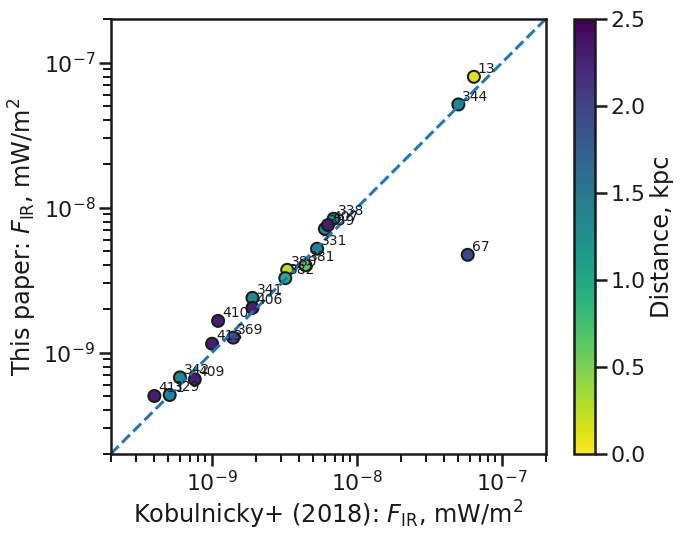

In [93]:
fig, ax = plt.subplots(figsize=(10, 8))
c = ax.scatter(t['FIR'], t['FIR_will'], 
               c=t['Dist'], cmap='viridis_r', vmin=0.0, vmax=2.5,
               edgecolors='k', alpha=1.0)
fig.colorbar(c, ax=ax).set_label('Distance, kpc')
for id_, x, y in zip(t['ID'], t['FIR'], t['FIR_will']):
    ax.annotate(
        str(id_), (x, y), fontsize='xx-small',
        xytext=(4,4), textcoords='offset points',
               )
fmin, fmax = 2e-10, 2e-7
ax.plot([fmin, fmax], [fmin, fmax], ls='--')
ax.set(
    xscale='log', yscale='log', 
    xlim=[fmin, fmax], ylim=[fmin, fmax],
    xlabel=r'Kobulnicky+ (2018): $F_\mathrm{IR}$, mW/m$^2$',
    ylabel=r'This paper: $F_\mathrm{IR}$, mW/m$^2$',
)
ax.set_aspect('equal')
fig.savefig('K18-flux-comparison.pdf')
None

So everything looks OK, except:

* Source 67 is over 10 times too bright in the Kobulnicky table

So, I will use my fluxes instead.  

Now add in the table that I transcribed from the 2018 paper:

In [94]:
tab18 = Table.read('kob18.fits')

In [95]:
tt = join(t, tab18, keys='ID')
tt['LIR_will'] = tt['FIR_will']*(u.erg/u.cm**2/u.s)*4*np.pi*(tt['Dist']*1e3*u.parsec).to(u.cm)**2 / const.L_sun.to(u.erg/u.s)
tt['LIR/L* will'] = tt['LIR_will']/(1e4*tt['L4'])
tt

ID,Name1,Name,SpType,Teff,R*,Dist,Dist1,Dist2,U,FIR,L*/LIR_1,LIR,Rad,Height,F8 or 12,F24 or 22,F70,F160,I70,T2x/70,Observatory,FIR_will,L4,V3,R0,S7,R0_as,l_as,l/R0,j_-12,D_kpc,FIR_-9,L*/LIR_2,Md_-8,LIR_will,LIR/L* will
,,,,K,solRad,kpc,arcsec,pc,,mW / m2,,,,,,,,,,,,,,,,,,,,,,,,,,
int64,str15,str17,str11,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64
13,zeta Oph,G006.2812+23.5877,O9.2IV,31000,7.2,0.14,29.0,0.02,170000.0,6.4e-08,1110.0,39.2080344138,173.0,404.0,51.32,343.77,246.7,61.55,9.8,158.0,WISE,7.99017e-08,8.1,1.3,0.175,12.3,299.0,277,0.93,8.7,0.11,64.0,3339.43,5.4,48.9498219269,0.000604318789221
67,NGC 6611 ESL 45,G017.0826+00.9744,O9V,31500,7.7,1.99,7.5,0.07,16000.0,5.8e-08,8.4,7179.15238422,9.0,9.0,0.31,27.659,4.41,-5.4,38.7,708.0,SST,4.72475e-09,5.1,1.3,0.08,64.0,7.5,15,2.0,11.0,1.99,58.0,7.09,6.2,584.822417713,0.0114671062297
329,KGK 2010 10,G077.0505-00.6094,O7V,35500,9.3,1.32,10.0,0.06,46000.0,5.1e-10,4400.0,27.7751916238,--,--,--,--,--,--,--,--,None,5.1e-10,7.9,2.0,0.219,15.4,10.0,27,2.7,8.4,4.1,0.51,294.2,2.5,27.7751916238,0.000351584704099
331,LS II+39 53,G078.2869+00.7780,O7V,35500,9.3,1.32,25.0,0.18,7300.0,5.3e-09,430.0,288.644148248,33.0,30.0,-0.017,28.45,12.72,-4.8,17.6,195.0,SST,5.2048e-09,12.0,2.5,0.296,12.0,42.0,55,1.31,8.3,1.32,5.3,414.87,4.5,283.459445811,0.00236216204843
338,CPR2002A10,G078.8223+00.0959,O9V,31500,7.7,1.32,23.0,0.15,3800.0,6.9e-09,160.0,375.782004322,24.0,16.0,1.179,32.85,55.63,-18.07,98.4,110.0,SST,8.37609e-09,7.9,1.2,0.162,79.8,23.0,29,1.26,8.9,1.32,6.9,209.79,33.0,456.171578056,0.00577432377286
339,CPR2002A37,G080.2400+00.1354,O5V,41500,11.1,1.32,70.0,0.45,2600.0,6e-09,1100.0,326.76696028,108.0,66.0,-0.34,31.116,40.7,-5.5,31.6,120.0,SST,7.13586e-09,32.0,2.9,0.493,29.9,70.0,47,0.67,8.3,1.32,6.0,977.24,31.0,388.627213531,0.00121446004228
341,KGK2010 1,G080.8621+00.9749,B2V,20900,5.4,1.32,20.0,0.13,470.0,1.9e-09,43.0,103.476204089,30.0,25.0,-0.278,10.669,11.98,-5.91,-99.9,126.0,SST,2.38474e-09,5.1,1.3,0.141,5.0,20.0,31,1.55,8.7,1.32,1.9,491.84,1.4,129.87570681,0.00254658248647
342,KGK2010 2,G080.9020+00.9828,B2V,20900,5.4,1.32,10.0,0.06,1900.0,6e-10,140.0,32.676696028,18.0,10.0,0.383,0.773,8.99,5.25,49.2,70.0,SST,6.7409e-10,1.4,0.8,0.07,57.8,10.0,14,1.4,8.9,1.32,0.6,427.54,14.0,36.7117233759,0.00262226595542


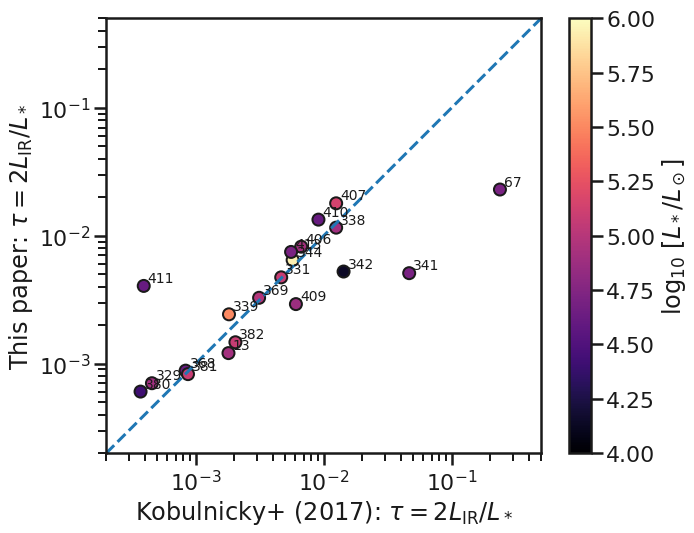

In [96]:
fig, ax = plt.subplots(figsize=(10, 8))
xx, yy = 2.0/tt['L*/LIR_1'], 2*tt['LIR/L* will']
c = ax.scatter(xx, yy, 
               c=4.0 + np.log10(tt['L4']), cmap='magma', vmin=4.0, vmax=6.0, 
               edgecolors='k', alpha=1.0)
fig.colorbar(c, ax=ax).set_label(r'$\log_{10}\ \left[L_* / L_\odot \right]$')
for id_, x, y in zip(tt['ID'], xx, yy):
    ax.annotate(
        str(id_), (x, y), fontsize='xx-small',
        xytext=(4,4), textcoords='offset points',
               )
fmin, fmax = 2e-4, 5e-1
ax.plot([fmin, fmax], [fmin, fmax], ls='--')
ax.set(
    xscale='log', yscale='log', 
    xlim=[fmin, fmax], ylim=[fmin, fmax],
    xlabel=r'Kobulnicky+ (2017): $\tau = 2 L_\mathrm{IR}/L_*$',
    ylabel=r'This paper: $\tau = 2 L_\mathrm{IR}/L_*$',
)
ax.set_aspect('equal')
fig.savefig('K17-tau-comparison.pdf')
None

In this graph we compare the original luminosity ratio taken directly from the Kobulnicky (2017) table (x axis) with the ratio calculated using my new total IR fluxes, combined with the new luminosities in the Kobulnicky (2018) table (y axis).   Most of the points show reasonable agreement between the two methods, with a few exceptions:

* 67: this had the $F_\text{IR}$ overestimated in K17.  Using a more reasonable value gives a lower $\tau$
* 341: The spectral class has changed from B2 (K17) to O9 (K18), increasing the assumed $L_*$, which lowers $\tau$
* 411: The luminosity class has changed from Ib (K17) to V (K18), so $L_*$ has been greatly reduced, which increases the estimated $\tau$

And there doesn't seem to be any significant correlation with stellar luminosity.

Next job is to estimate the shell pressure from the $\tau$:

1. Assume UV dust opacity per gas mass gives column density: $\Sigma = \tau/\kappa$.
2. Using measured thickness, find $\rho = \Sigma / H$
3. Assume sound speed, so $P_\mathrm{shell} = \rho a^2$

Putting it all together gives $P_\mathrm{shell} = \tau a^2 / \kappa H$.

Then we can compare that with the radiation pressure at the shell:
$$
P_\mathrm{rad} = \frac{L_*}{4\pi R^2 c}
$$
and define an observational momentum trapping efficiency: $\eta_\mathrm{obs} = P_\mathrm{shell} / P_\mathrm{rad}$, so that:
$$
\eta_\mathrm{obs} = \frac{\tau a^2}{\kappa H} \frac{4\pi R^2 c}{L_*}
$$
If we expand out the $\tau$, we se that $\eta_\mathrm{obs} \propto L_*^{-2}$, which is quite a steep sensitivity (especially since $L_*$ may be just a guess). 

Make a new table that just has the columns that we want.  We take the $R_0$ from K18 Table 1.  The thickness $H$ could be taken from K17: "Height" in Tables 1 and 2. *But* I don't trust those values.  For instance, zeta Oph clearly has $H < 60''$ from its image, but the table gives $404''$, which is ridiculous given that $R_0 = 299''$. In fact, when I use these columns and calculate $H/R$, then I get a range from 0.5 to 3, which does not make any sense.

_But maybe "height" is not what I think it is._ What is really wanted is the FWHM of the brightness profile, but H is measured at a low contour (small fraction of the peak brightness), so it is too large. 

It would be better to simply assume $H/R = 3 / (4 M^2)$, which is $\approx 0.1$ if $V = 30$ km/s, but more likely the velocities are lower.  Let's assume 0.25 for now.  Assume $\kappa = 600$ and $a = 11.4$ km/s

In [97]:
colnames = tt.colnames[0:5] + ['L4', 'LIR_will', 'R0', 'D_kpc', 'U', 'Md_-8', 'V3']
ttt = tt[colnames]
ttt['tau'] = np.round(2*tt['LIR/L* will'], decimals=5)
ttt['H/R'] =np.round(tt['Height'] / tt['R0_as'], decimals=2)

cs = (11.4*u.km/u.s).cgs
kappa = 600.0*u.cm**2/u.g
H_R = 0.25

ttt['P_k_shell'] = np.array(ttt['tau'])*(cs**2 / (const.k_B*kappa * H_R * ttt['R0']*u.parsec)).cgs
ttt['n_shell'] = np.round(ttt['P_k_shell']/u.Kelvin/(2 * 1.0e4), decimals=1)
ttt['P_k_rad'] = (1e4*const.L_sun*ttt['L4'] / (4*np.pi * (ttt['R0']*u.pc)**2 * const.c * const.k_B)).cgs
ttt['eta_obs'] = np.round(ttt['P_k_shell'].data/ttt['P_k_rad'].data, decimals=5)
ttt

ID,Name1,Name,SpType,Teff,L4,LIR_will,R0,D_kpc,U,Md_-8,V3,tau,H/R,P_k_shell,n_shell,P_k_rad,eta_obs
,,,,K,,,,,,,,,,K / cm3,1 / cm3,K / cm3,
int64,str15,str17,str11,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
13,zeta Oph,G006.2812+23.5877,O9.2IV,31000,8.1,48.9498219269,0.175,0.11,170000.0,5.4,1.3,0.00121,1.35,140615.141538,7.0,20444008.9088,0.00688
67,NGC 6611 ESL 45,G017.0826+00.9744,O9V,31500,5.1,584.822417713,0.08,1.99,16000.0,6.2,1.3,0.02293,1.2,5829064.14469,291.5,61595267.003,0.09463
329,KGK 2010 10,G077.0505-00.6094,O7V,35500,7.9,27.7751916238,0.219,4.1,46000.0,2.5,2.0,0.0007,--,65003.791986,3.3,12731981.5801,0.00511
331,LS II+39 53,G078.2869+00.7780,O7V,35500,12.0,283.459445811,0.296,1.32,7300.0,4.5,2.5,0.00472,0.71,324291.118244,16.2,10586562.4549,0.03063
338,CPR2002A10,G078.8223+00.0959,O9V,31500,7.9,456.171578056,0.162,1.32,3800.0,33.0,1.2,0.01155,0.7,1449945.69347,72.5,23267740.0001,0.06232
339,CPR2002A37,G080.2400+00.1354,O5V,41500,32.0,388.627213531,0.493,1.32,2600.0,31.0,2.9,0.00243,0.94,100240.706987,5.0,10176847.8076,0.00985
341,KGK2010 1,G080.8621+00.9749,B2V,20900,5.1,129.87570681,0.141,1.32,470.0,1.4,1.3,0.00509,1.25,734147.689612,36.7,19828464.8066,0.03702
342,KGK2010 2,G080.9020+00.9828,B2V,20900,1.4,36.7117233759,0.07,1.32,1900.0,14.0,0.8,0.00524,1.0,1522362.27615,76.1,22084577.5249,0.06893


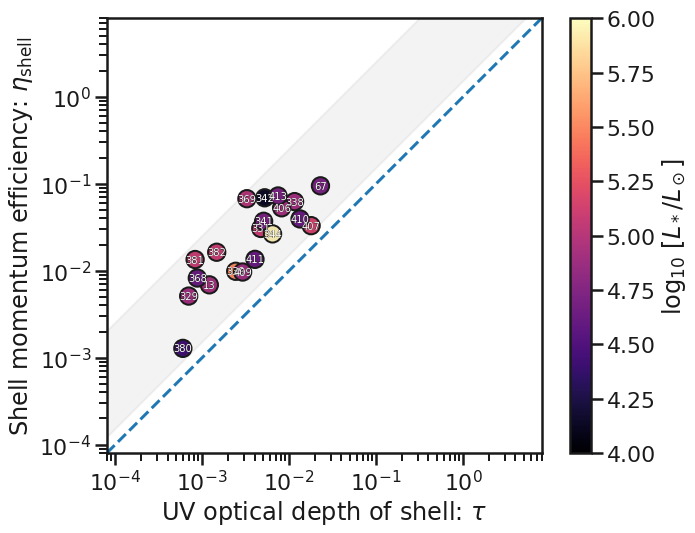

In [98]:
fig, ax = plt.subplots(figsize=(10, 8))
xx, yy = ttt['tau'], ttt['eta_obs']
c = ax.scatter(xx, yy, 
               c=4.0 + np.log10(tt['L4']),
#               c=np.log10(tt['Teff']), 
               cmap='magma', vmin=4.0, vmax=6.0,
               edgecolors='k', alpha=1.0, s=300)
fig.colorbar(c, ax=ax).set_label(
    r'$\log_{10}\ \left[L_* / L_\odot \right]$'
#    r'$\log_{10}\ \left[T_\mathrm{eff} \right]$'
)
for id_, x, y in zip(tt['ID'], xx, yy):
    ax.annotate(
        str(id_), (x, y), fontsize=10, color='k', 
        fontweight='black', fontstretch='condensed',
        xytext=(0,0), textcoords='offset points', ha='center', va='center',
    )
    ax.annotate(
        str(id_), (x, y), fontsize=10, color='w',
        xytext=(0,0), textcoords='offset points', ha='center', va='center',
    )



fmin, fmax = 8e-5, 8.0
ax.plot([fmin, fmax], [fmin, fmax], ls='--')
ax.fill_between([fmin, fmax], [25*fmin, 25*fmax], [1.5*fmin, 1.5*fmax], color='k', alpha=0.05)
ax.set(
    xscale='log', yscale='log', 
    xlim=[fmin, fmax], ylim=[fmin, fmax],
    xlabel=r'UV optical depth of shell: $\tau$',
    ylabel=r'Shell momentum efficiency: $\eta_\mathrm{shell}$',
)
ax.set_aspect('equal')
fig.savefig('K18-eta-tau.pdf')
None

Now do the same, but plot $\eta/\tau$ against $\tau$ to remove the linear trend. 

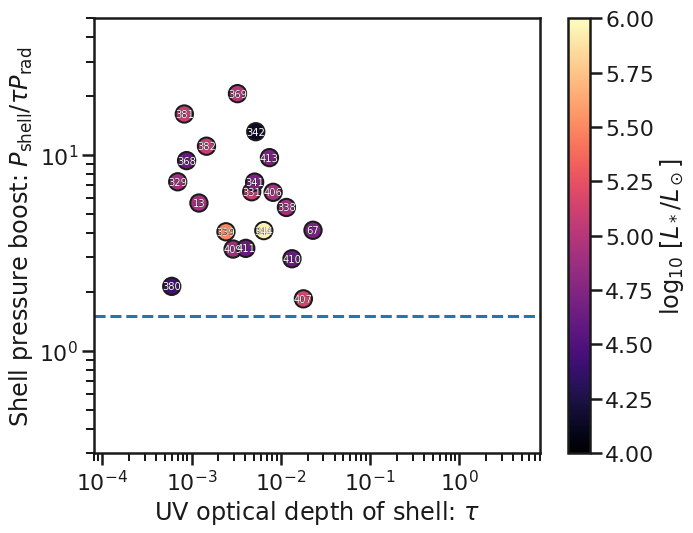

In [99]:
fig, ax = plt.subplots(figsize=(10, 8))
xx, yy = ttt['tau'], ttt['eta_obs']/ttt['tau']
c = ax.scatter(xx, yy, 
               c=4.0 + np.log10(tt['L4']),
#               c=np.log10(tt['Teff']), 
               cmap='magma', vmin=4.0, vmax=6.0,
               edgecolors='k', alpha=1.0, s=300)
fig.colorbar(c, ax=ax).set_label(
    r'$\log_{10}\ \left[L_* / L_\odot \right]$'
#    r'$\log_{10}\ \left[T_\mathrm{eff} \right]$'
)
for id_, x, y in zip(tt['ID'], xx, yy):
    ax.annotate(
        str(id_), (x, y), fontsize=10, color='k', 
        fontweight='black', fontstretch='condensed',
        xytext=(0,0), textcoords='offset points', ha='center', va='center',
    )
    ax.annotate(
        str(id_), (x, y), fontsize=10, color='w',
        xytext=(0,0), textcoords='offset points', ha='center', va='center',
    )



fmin, fmax = 8e-5, 8.0

ax.axhline(1.5, ls='--')
#ax.plot([fmin, fmax], [fmin, fmax], ls='--')
#ax.fill_between([fmin, fmax], [25*fmin, 25*fmax], [1.5*fmin, 1.5*fmax], color='k', alpha=0.05)
ax.set(
    xscale='log', yscale='log', 
    xlim=[fmin, fmax], ylim=[0.3, 50.0],
    xlabel=r'UV optical depth of shell: $\tau$',
    ylabel=r'Shell pressure boost: $P_\mathrm{shell} / \tau P_\mathrm{rad}$',
)
#ax.set_aspect('equal')
fig.savefig('K18-eta-tau-compensated.pdf')
None

Now, before proceeding to the mass loss rates, let's do a factor plot of some selected parameters:

In [100]:
from scipy import stats

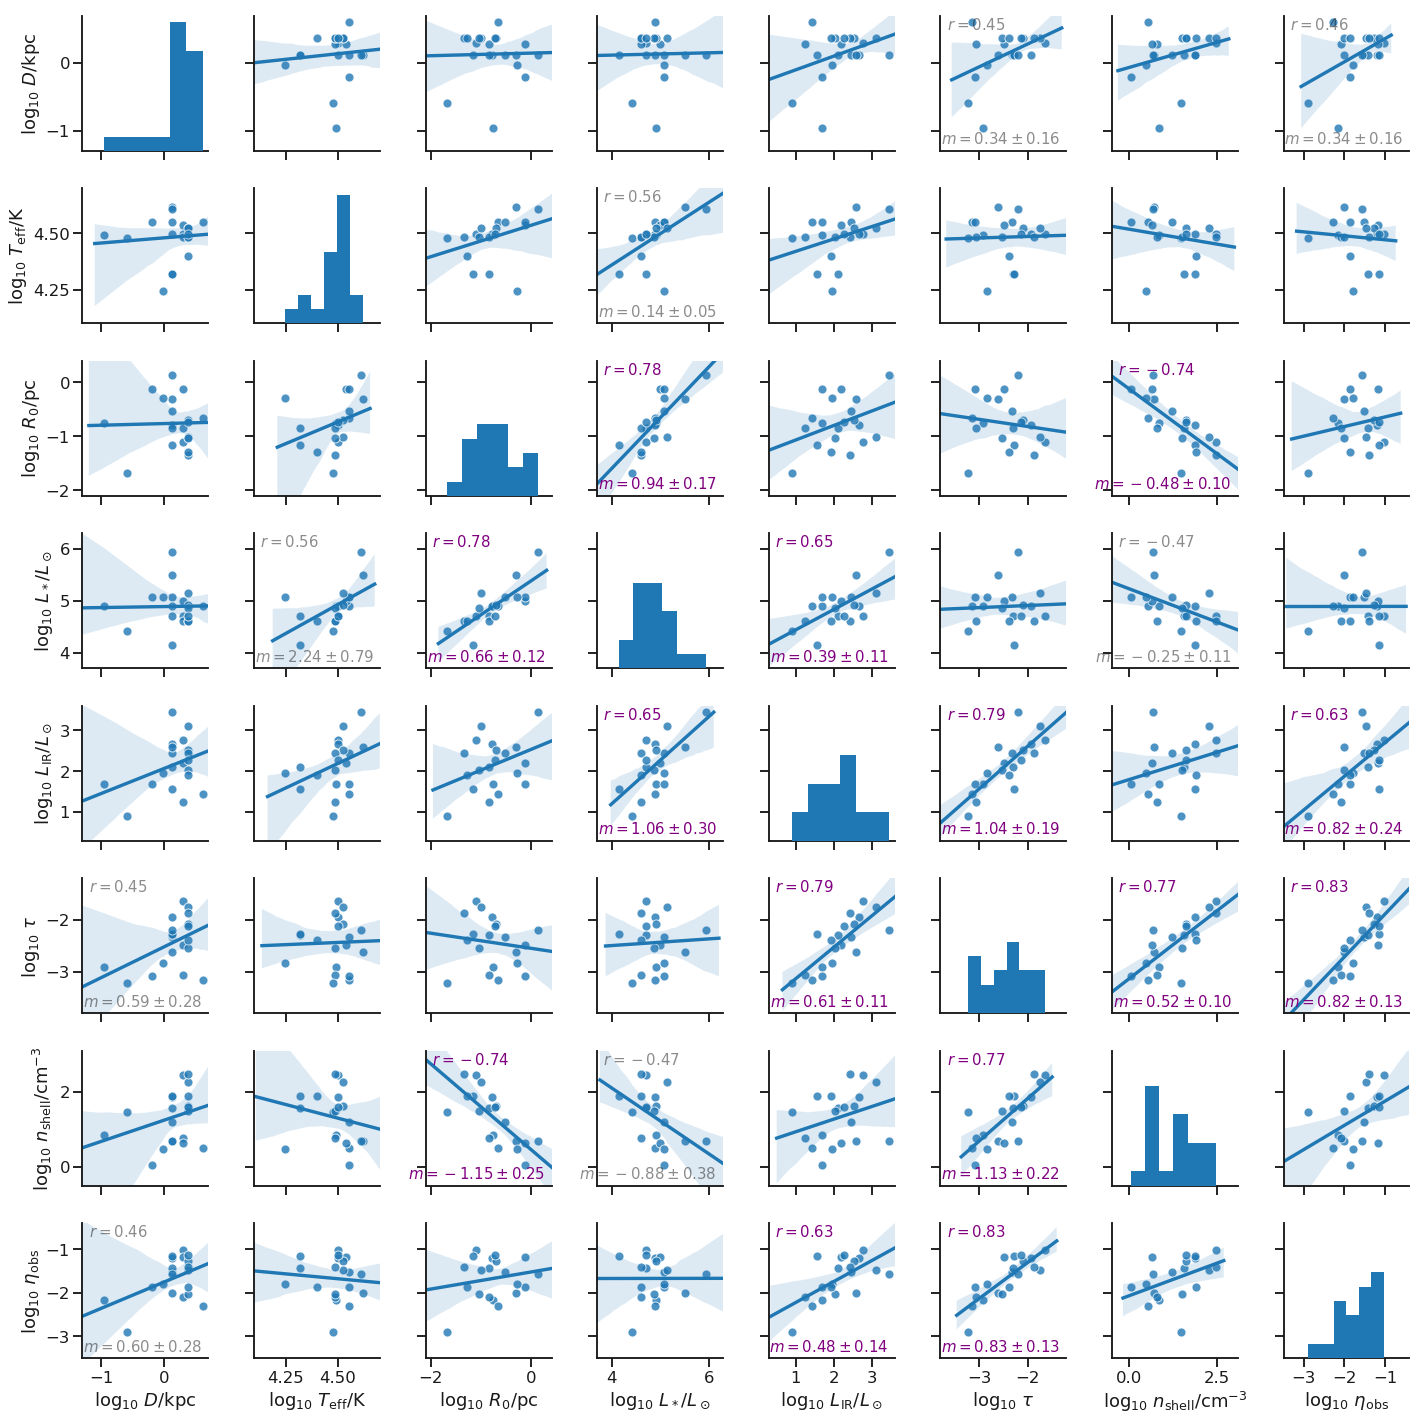

In [243]:
df = ttt.to_pandas()
df.set_index(keys='ID', inplace=True)
columns = ['D_kpc', 'Teff', 'R0', 'L4', 'LIR_will', 'tau', 'n_shell', 'eta_obs']
pretty = [
    r'$\log_{10}\ D / \mathrm{kpc}$', 
    r'$\log_{10}\ T_\mathrm{eff} / \mathrm{K}$', 
    r'$\log_{10}\ R_0 / \mathrm{pc}$', 
    r'$\log_{10}\ L_* / L_\odot$', 
    r'$\log_{10}\ L_\mathrm{IR} / L_\odot$', 
#    r'$\log_{10}\ F_\mathrm{IR} / \mathrm{erg\ s^{-1}\ cm^{-2}}$', 
    r'$\log_{10}\ \tau$', 
    r'$\log_{10}\ n_\mathrm{shell} / \mathrm{cm^{-3}}$', 
    r'$\log_{10}\ \eta_\mathrm{obs}$',     
]
minmax = [ 
    [-1.3, 0.7], # D
    [4.1, 4.7], # Teff
    [-2.1, 0.4], # R0
    [3.7, 6.3], # was L4 (but now just L/Lsun)
    [0.3, 3.6], # LIR
#    [-10.3, -6.7], # FIR
    [-3.8, -1.2], # tau
    [-0.5, 3.1], # n_shell
    [-3.5, -0.4], # eta_obs
]
df = df.assign(**{col: np.log10(df[col]) for col in columns})
df = df.assign(
    L4=4.0 + df.L4,
    close=pd.Categorical((df['D_kpc'] < 1.5).astype('S5')),
)

def corrfunc(x, y, **kws):
    slope, intercept, rvalue, pvalue, stderr = stats.linregress(x, y)
#    r, p = stats.pearsonr(x, y)
    ax = plt.gca()
    if pvalue < 0.05:
        fontcolor = 'purple' if pvalue < 0.003 else 'k'
        fontalpha = 1.0 if pvalue < 0.003 else 0.5
        ax.annotate(f"$r = {rvalue:.2f}$",
                    xy=(.05, .9), xycoords=ax.transAxes, 
                    fontsize='small', color=fontcolor, alpha=fontalpha)
        ax.annotate(rf"$m = {slope:.2f} \pm {stderr:.2f}$",
                    xy=(.95, .05), ha='right', xycoords=ax.transAxes, 
                    fontsize='small', color=fontcolor, alpha=fontalpha)

    
with sns.plotting_context('talk', font_scale=1.0):
    g = sns.pairplot(df, vars=columns, 
                     diag_kind='hist', 
#             diag_kind='kde',
#             hue='close', 
                     kind='reg',
                     plot_kws=dict(scatter_kws=dict(edgecolor='w')),
                     diag_kws=dict(bins=6),
                    )
    g.map_offdiag(corrfunc)
    for j, [[v1, v2], label] in enumerate(zip(minmax, pretty)):
        g.axes[j, j].set(xlim=[v1, v2], ylim=[v1, v2])
        g.axes[-1, j].set(xlabel=label)
        g.axes[j, 0].set(ylabel=label)
    plt.gcf().savefig('K18-pairplot.pdf')
    
#df

Some observations about these correlations:

1. The basic observational parameters are $D$, $T_\mathrm{eff}$, $R_0$, $L_*$, $L_\mathrm{IR}$.  In principle, observational errors in these should all be independent, so any correlations between them are real. 
    1. The first three are the best determined, and there are no significant corrlations between them.
    2. The luminosities might potentially suffer from Malmquist bias, but there is no evidence for this in the case of $L_*$ since low luminosities are seen at the largest distance.  In the case of $L_\mathrm{IR}$, there is a slight increasing trend with distance, which might indicate bias, but it is only marginally significant.
    3. $R_0$ could also be Malmquist biased due to angular resolution, but there is no trend in $R_0$–$D$, so it seems not.  This is probably because the smallest bows in this subsample have angular sizes $> 4''$ and are still just resolved at Carina at 8 micron (Spitzer has $2''$ resolution at 8 micron).

2. $\tau$ is found from $L_\mathrm{IR}/L_*$, meaning that errors in $L_*$ would give negative $\tau$–$L_*$ correlation, but they seem to be uncorrelated so we are probably OK.  

3. If $L_*$ were determined from photometry, then any distance errors would give a spurious $R_0 \propto L_*^{1/2}$ correlation.  **So it is a good job that it is found from spectral classification instead**.  Also, the distances should be reliable.

4. What we actually see is a linear $R_0 \propto L_*$ correlation.  This is the most significant correlation of all ($r = 0.79$), implying that >60% of the variation in $R_0$ is driven by the stellar luminosity, leaving only 40% left for the environment (and other stellar properties). 

5. We also have a moderate correlation between $L_*$ and $T_\mathrm{eff}$, which is clearly because half the stars are MS, with a tight correlation, and the other half are evolved

6. Other strong correlations:
    1. $L_\mathrm{IR}$–$L_*$: approximately linear, explaining 45% in variance of $L_\mathrm{IR}$.  This means that there is no trend in $\tau$ with $L_*$
    2. $\tau$–$L_\mathrm{IR}$ is very well correlated with $m \approx -1$.  **However**, this is exactly what you would get if the dispersion about the linear $L_\mathrm{IR}$–$L_*$ trend were entirely due to measurement errors in $L_\mathrm{IR}$.  Hopefully, that is not the case, but it needs checking.  The std dev of log $\tau$ is about 0.5 dex (the same is true of nearly all the parameters, except for $T_\mathrm{eff}$).


In [102]:
df.describe()

,Teff,L4,LIR_will,R0,D_kpc,U,Md_-8,V3,tau,H/R,P_k_shell,n_shell,P_k_rad,eta_obs
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,19.000000,2.000000e+01,20.000000,2.000000e+01,20.000000
mean,4.483122,4.891203,2.150781,-0.757840,0.133520,37734.000000,15.801000,1.620000,-2.439650,1.294737,1.230339e+06,1.324996,5.670921e+07,-1.668464
std,0.095008,0.382034,0.627911,0.456657,0.362161,69134.138372,28.770742,0.670114,0.479884,0.699288,1.806601e+06,0.707888,1.034224e+08,0.480811
min,4.245513,4.146128,0.895608,-1.677781,-0.958607,320.000000,0.220000,0.800000,-3.221849,0.440000,2.284117e+04,0.041393,1.301503e+06,-2.892790
25%,4.482505,4.683874,1.694645,-1.047865,0.120574,2425.000000,2.425000,1.200000,-2.853816,0.825000,9.931096e+04,0.694538,1.048413e+07,-2.008679
50%,4.498311,4.897627,2.156888,-0.773723,0.205304,4150.000000,5.950000,1.300000,-2.359301,1.140000,6.097946e+05,1.483842,1.775844e+07,-1.545222
75%,4.539976,5.079181,2.542345,-0.473319,0.371068,33000.000000,15.250000,2.125000,-2.116992,1.610000,1.468050e+06,1.865600,6.272988e+07,-1.258875
max,4.618048,5.939519,3.447900,0.133219,0.612784,230000.000000,130.000000,3.000000,-1.639596,2.950000,5.897701e+06,2.469675,4.557135e+08,-1.023971


## Finally the mass loss rates

In my approach, $\dot M$ comes from balancing the shell pressure with the ram pressure: $\eta_{\mathrm{sh}} = \eta_{\mathrm{w}}$.  So 
$$
\dot M_{-7} = 2.02 L_4 \eta / V_3
$$

In [103]:
ttt['Md'] = 2.02e-7*ttt['L4']*ttt['eta_obs'] / ttt['V3']
ttt['Md_K18'] = 1e-8*ttt['Md_-8']

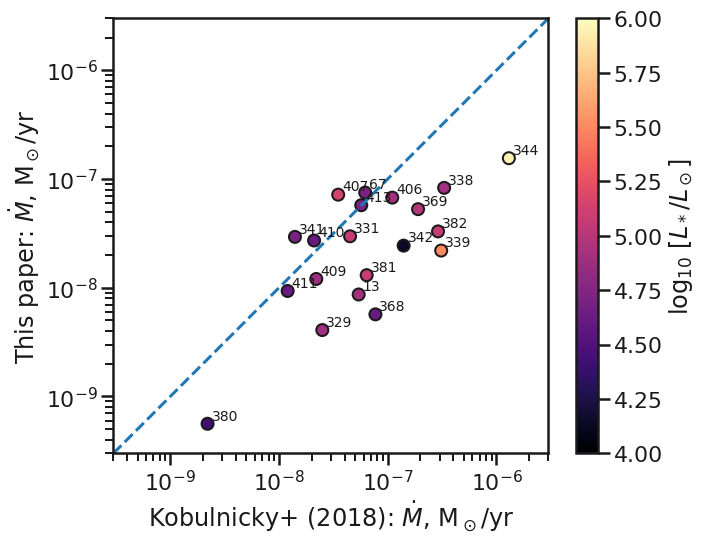

In [104]:
fig, ax = plt.subplots(figsize=(10, 8))
xx, yy = ttt['Md_K18'], ttt['Md']
c = ax.scatter(xx, yy, 
               c=4.0 + np.log10(tt['L4']), cmap='magma', vmin=4.0, vmax=6.0, 
               edgecolors='k', alpha=1.0)
fig.colorbar(c, ax=ax).set_label(r'$\log_{10}\ \left[L_* / L_\odot \right]$')
for id_, x, y in zip(tt['ID'], xx, yy):
    ax.annotate(
        str(id_), (x, y), fontsize='xx-small',
        xytext=(4,4), textcoords='offset points',
               )
fmin, fmax = 3e-10, 3e-6
ax.plot([fmin, fmax], [fmin, fmax], ls='--')
ax.set(
    xscale='log', yscale='log', 
    xlim=[fmin, fmax], ylim=[fmin, fmax],
    xlabel=r'Kobulnicky+ (2018): $\dot M$, M$_\odot$/yr',
    ylabel=r'This paper: $\dot M$, M$_\odot$/yr',
)
ax.set_aspect('equal')
fig.savefig('K18-mdot-comparison.pdf')
None

Why do we have such a lack of correlation?  Is it my fault or theirs?  Theirs, I hope.

In [157]:
ttt['LIR_K18'] = tt['L4']/tt['L*/LIR_2']
ttt['LIR_K17'] = tt['L4']/tt['L*/LIR_1']
ttt['R/L'] = tt['R0']/tt['L4']
ttt['LIR/V'] = tt['LIR_will']/tt['V3']
ttt['RL/LV'] = tt['R0']*tt['LIR_will']/(tt['L4']*tt['V3'])
ttt['MdMd'] = ttt['Md_K18']/ttt['Md']
ttt['theta'] = ttt['R0']/ttt['D_kpc']/206.264
ttt['FIR'] = tt['FIR_will']
columns = ['D_kpc', 'Teff', 'theta', 'R0', 'L4', 'R/L', 'LIR/V', 'FIR', 'LIR_will', 'LIR_K18', 'LIR_K17', 
           'U', 'tau', 'n_shell', 'eta_obs', 'V3', 'RL/LV', 'Md', 'Md_K18', 'MdMd']
mdf = ttt[columns].to_pandas()
mdf = mdf.assign(**{col: np.log10(mdf[col]) for col in mdf.columns})
mdf.corr()

,D_kpc,Teff,theta,R0,L4,R/L,LIR/V,FIR,LIR_will,LIR_K18,LIR_K17,U,tau,n_shell,eta_obs,V3,RL/LV,Md,Md_K18,MdMd
D_kpc,1.000000,0.087529,-0.609553,0.024385,0.017973,0.015021,0.366564,-0.600640,0.353206,0.500092,0.223877,-0.246416,0.448032,0.289835,0.455681,0.026754,0.392502,0.392073,0.110061,-0.328970
Teff,0.087529,1.000000,0.212453,0.337333,0.557849,-0.207840,0.196169,0.301523,0.365247,0.395251,0.146495,0.146285,0.033822,-0.196720,-0.089059,0.697017,0.101431,0.101406,0.195682,0.138013
theta,-0.609553,0.212453,1.000000,0.777645,0.610746,0.428515,-0.085335,0.643007,0.071461,-0.066935,0.104192,-0.366852,-0.392050,-0.769660,-0.138028,0.589153,0.125993,0.126432,0.536703,0.562632
R0,0.024385,0.337333,0.777645,1.000000,0.784444,0.552297,0.183098,0.334523,0.370235,0.312199,0.308943,-0.658049,-0.139079,-0.740731,0.187325,0.764178,0.470168,0.470381,0.764104,0.448619
L4,0.017973,0.557849,0.610746,0.784444,1.000000,-0.083781,0.469459,0.593009,0.646779,0.545666,0.446996,-0.314497,0.050959,-0.472354,0.001159,0.787473,0.450844,0.451033,0.614585,0.272612
R/L,0.015021,-0.207840,0.428515,0.552297,-0.083781,1.000000,-0.336841,-0.259616,-0.274512,-0.231847,-0.104450,-0.634564,-0.291957,-0.555225,0.299420,0.169327,0.149419,0.149508,0.401597,0.354369
LIR/V,0.366564,0.196169,-0.085335,0.183098,0.469459,-0.336841,1.000000,0.424150,0.966352,0.833622,0.844763,-0.238161,0.891757,0.486853,0.690541,0.083803,0.880661,0.880618,0.469985,-0.441650
FIR,-0.600640,0.301523,0.643007,0.334523,0.593009,-0.259616,0.424150,1.000000,0.490971,0.331512,0.470710,0.042370,0.170851,-0.101197,0.017142,0.349695,0.314793,0.315093,0.341136,0.072751
LIR_will,0.353206,0.365247,0.071461,0.370235,0.646779,-0.274512,0.966352,0.490971,1.000000,0.877565,0.843938,-0.295877,0.794645,0.299829,0.630464,0.337302,0.876687,0.876671,0.542825,-0.339676
LIR_K18,0.500092,0.395251,-0.066935,0.312199,0.545666,-0.231847,0.833622,0.331512,0.877565,1.000000,0.820576,-0.205460,0.714560,0.283727,0.575824,0.348759,0.758768,0.758572,0.442976,-0.329573


So, $r = 0.7 \therefore r^2 = 0.477$ between the two $\dot M$ estimates, meaning only half the variance in one is explained by the other. 


My $\dot M$ comes explicitly from $L_* \eta / V$.  The respective $r^2$ are 0.23, 0.74, 0.06, which sum to 1.03, not 1, due to mutual covariance between $L_*$ and $V$ ($\eta$ is totally uncorrelated with either, interestingly).  So my $\dot M$ is _mostly_ determined by $\eta$, but $\eta$ itself comes from $R \tau /L_*$ and $\tau$ comes from $L_\mathrm{IR} / L_*$, so expanding everything: $\eta$ comes from  $R L_\mathrm{IR}/ L_*^2$ so 
$$
\dot M \propto \frac{R L_\mathrm{IR}}{L_* V} \ .
$$

*Note* we made a column `RL/LV` to check that it is the same as $\dot M$ -- thankfully _it is!_  

Rather than the `.corr()`, we will use `.cov()` to get the raw covariance matrix.  This is more useful in some respects, since it more clearly shows how much variance there is in the individual parameters.  For instance, stellar wind velocity has very low dispersion.  Since we have taken log of all quantities, there is no problem with disparate numerical scales. 

In [106]:
mdf[['LIR_will', 'L4', 'R0', 'R/L', 'V3', 'Md']].cov()

,LIR_will,L4,R0,R/L,V3,Md
LIR_will,0.394272,0.155151,0.106161,-0.048990,0.034329,0.311164
L4,0.155151,0.145950,0.136853,-0.009097,0.048762,0.097401
R0,0.106161,0.136853,0.208535,0.071683,0.056562,0.121421
R/L,-0.048990,-0.009097,0.071683,0.080780,0.007800,0.024020
V3,0.034329,0.048762,0.056562,0.007800,0.026271,0.015878
Md,0.311164,0.097401,0.121421,0.024020,0.015878,0.319528


So, from that it is clear that _operationally_ the principal determinant of my $\dot M$ is the infrared luminosity.  Also look at correlation matrix for good measure.

In [107]:
mdf[['LIR_will', 'L4', 'R0', 'R/L', 'V3', 'Md']].corr()

,LIR_will,L4,R0,R/L,V3,Md
LIR_will,1.000000,0.646779,0.370235,-0.274512,0.337302,0.876671
L4,0.646779,1.000000,0.784444,-0.083781,0.787473,0.451033
R0,0.370235,0.784444,1.000000,0.552297,0.764178,0.470381
R/L,-0.274512,-0.083781,0.552297,1.000000,0.169327,0.149508
V3,0.337302,0.787473,0.764178,0.169327,1.000000,0.173297
Md,0.876671,0.451033,0.470381,0.149508,0.173297,1.000000


So, infrared luminosity determines 75% of $\dot M$ variance, while $V$ clearly has no influence on anything (< 6% level). Interestingly neither does $R/L_*$ even though that is part of the operational determinant of $\dot M$ and $R$ and $L$ do individually contribute to $\dot M$ variance at 25% level.  Part of the reason must be simply that $R/L_*$ does not vary much, having a rms dispersion of 0.3 dex (about factor 2). 

So, where does the extra 25% variance in $\dot M$ come from?  There is a weak negative correlation of $L_{\mathrm{IR}}$ with $R/L_*$ that might have something to do with it.  This means that mass loss rate shows less dispersion (0.55 dex) than the IR luminosity (0.62 dex).  Whatever, it doesn't really matter.

Note that the diagonal elements of the covariance array are the variances, so std is sqrt of that.

_Alternatively ..._ we can put it in exclusively empirical terms: $F_{\mathrm{IR}}$, $D$, $\theta$.
$$
\dot M \propto \frac{\theta D^3 F_{\mathrm{IR}}}{L_* V}  
$$

In [159]:
mdf[['D_kpc', 'theta', 'FIR', 'L4', 'V3', 'Md']].corr()

,D_kpc,theta,FIR,L4,V3,Md
D_kpc,1.000000,-0.609553,-0.600640,0.017973,0.026754,0.392073
theta,-0.609553,1.000000,0.643007,0.610746,0.589153,0.126432
FIR,-0.600640,0.643007,1.000000,0.593009,0.349695,0.315093
L4,0.017973,0.610746,0.593009,1.000000,0.787473,0.451033
V3,0.026754,0.589153,0.349695,0.787473,1.000000,0.173297
Md,0.392073,0.126432,0.315093,0.451033,0.173297,1.000000


But, as can be seen, $\dot M$ is correlated with none of these very well. So, best stick with $L$ and $R$. 

### Now, look at their Mdots

What do they really depend on?  

1. They use the LOS column density, instead of the radial column density, which they estimate from the 70 micron surface brightness, together with an estimate of the 70 micron emissivity, $j_\nu$, which depends on the radiation field $U$.  They claim that $j_\nu \propto U^{1/2}$ ($j_\nu$ is emissivity 

2. They skip out the middle man of the shell and directly balance the ram pressure of the wind with the ram pressure of the ambient stream. _Except that not really, since they use the density of the shell and then say that it is factor of 4 times the ambient density._

3. They just assume a stream velocity of 30 km/s, so they don't depend on the gas temperature in the shell (although, in reality it should effect the compression ratio). 

$$
\frac{\dot M V}{4 \pi R^2} = (\rho_s / \delta) v_a^2  
$$
Also, apparently 
$$
\rho_s = m I_\nu / \ell j_\nu
$$
From their equation (8) this gives the following dependency for $\dot M$:
$$
\dot M = 4 \pi \left[ \frac{R^2 I_\nu}{\ell V_w}  \right] \left[ \frac{V_a^2 m }{j_\nu(U) \delta } \right]  
$$
where first term in square brackets is measured (or at least estimated per star) quantities, while second term is in square brackets is assumed parameters, except that $j_\nu (U)$ is the dust emissivity (Jy.cm2/sr/nucleon = 1e-23 erg/s/sr/nucleon) as a function of radiation field where $U F_0 = L / 4 \pi R^2$ with $F_0 = 0.0217$ erg/cm2/s being the ISRF flux, but integrated across the whole SED. 

We show below in the next section that (1) they are not using the $j_\nu(U)$ that they claim to be using, and (2) they should be using a somewhat different one anyway (because of SED shape).  However, we have corrected that, so we can proceed with the analysis.  As in K18, approximate the $U$ dependence as $U^{1/2} = L_*^{1/2} R^{-1}$. So, the $\dot M$ breakdown becomes:
$$
\dot M \propto \left[ \frac{R^3 I_\nu}{\ell L_*^{1/2} V_w}  \right] \left[ \frac{V_a^2 m }{j_0 \delta } \right]
$$

Or
$$
\dot M \propto \left[ \frac{R I_\nu}{(\ell/R) U^{1/2} V_w}  \right] \left[ \frac{V_a^2 m }{j_0 \delta } \right]
$$

##  An investigation of radiation field, $U$, dust emissivity, $j_\nu$, and mass loss rate for K17 and K18

_Revisiting this, now that I have established that the DL07 emissivities are too low for OB stars if one uses bolometric flux for the U (because the ISRF has only a small fraction at UV wavelengths)._

What is the `U` column in the table?  It comes from Table 5 of K17 and supposedly comes from the $T_{\mathrm{eff}}$, $R_*$ and $R_0$ from the same table.   We have this table, so we can check this.

In [39]:
tab05['UU'] = 0.01329*(tab05['Teff']/1e4)**4 * tab05['R*']**2 / tab05['Dist2']**2
tab05

ID,Name1,Name,SpType,Teff,R*,Dist,Dist1,Dist2,U,FIR,L*/LIR,LIR,UU
,,,,K,solRad,kpc,arcsec,pc,,mW / m2,,,
int64,str15,str17,str11,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64
13,zeta Oph,G006.2812+23.5877,O9.2IV,31000,7.2,0.14,29.0,0.02,170000.0,6.4e-08,1110.0,39.2080344138,159065.779406
67,NGC 6611 ESL 45,G017.0826+00.9744,O9V,31500,7.7,1.99,7.5,0.07,16000.0,5.8e-08,8.4,7179.15238422,15832.6119091
329,KGK 2010 10,G077.0505-00.6094,O7V,35500,9.3,1.32,10.0,0.06,46000.0,5.1e-10,4400.0,27.7751916238,50710.9550173
331,LS II+39 53,G078.2869+00.7780,O7V,35500,9.3,1.32,25.0,0.18,7300.0,5.3e-09,430.0,288.644148248,5634.55055748
338,CPR2002A10,G078.8223+00.0959,O9V,31500,7.7,1.32,23.0,0.15,3800.0,6.9e-09,160.0,375.782004322,3447.99103797
339,CPR2002A37,G080.2400+00.1354,O5V,41500,11.1,1.32,70.0,0.45,2600.0,6e-09,1100.0,326.76696028,2398.49213016
341,KGK2010 1,G080.8621+00.9749,B2V,20900,5.4,1.32,20.0,0.13,470.0,1.9e-09,43.0,103.476204089,437.533127024
342,KGK2010 2,G080.9020+00.9828,B2V,20900,5.4,1.32,10.0,0.06,1900.0,6e-10,140.0,32.676696028,2053.97495742


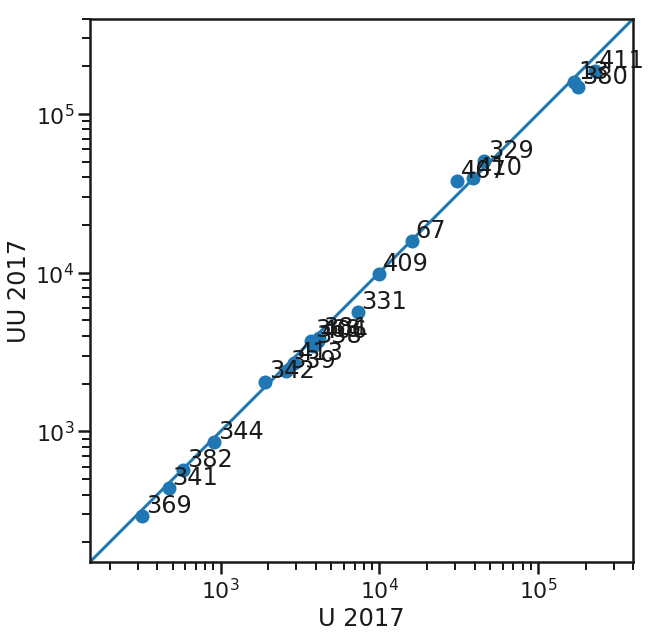

In [40]:
ddf = tab05['ID', 'U', 'UU'].to_pandas()
fig, ax = plt.subplots(figsize=(10, 10))
vmin, vmax = 150, 4e5
ax.scatter(x='U', y='UU', data=ddf)
ax.plot([vmin, vmax], [vmin, vmax])
for id_, x, y in zip(tab05['ID'], tab05['U'], tab05['UU']):
    ax.annotate(
        str(id_), (x, y),
        xytext=(4,4), textcoords='offset points',
               )
ax.set(xscale='log', yscale='log', 
       xlim=[vmin, vmax], ylim=[vmin, vmax],
       xlabel='U 2017', ylabel='UU 2017',
      )
ax.set_aspect('equal')

So the previous plot shows the `U` column from K17 Tab 5 on the x axis, and the $U$ that I calculate from the `Teff`, `R*`, and `Dist2` (equals radius) columns of the same table on the y axis. 

It is strange that there is any scatter at all, but this shows that there isn't a serious problem with the way that K17 calculated their $U$. 

Next we compare with the K18 values, to work out where they got their $U$ from.  We have got the original tables from the ApJ website and exported them to FITS (see `dust-wave-case-studies.org`).

_Note that we have to explicitly change some columns from string to float._

In [41]:
k18tab1 = Table.read('data/Kobulnicky2018/k18tab1.fits')
k18tab2 = Table.read('data/Kobulnicky2018/k18tab2.fits')
k18tab = join(k18tab1, k18tab2, keys=('ID', 'Name', 'Alt. name'), join_type='left')
for col in 'U', 'j_nu', 'Mdot':
    k18tab[col] = k18tab[col].astype('float')
k18tab

ID,Name,Alt. name,Sp.T._1,Ref.01,T_eff,R_*,Mass,V_inf_{},D,Ref.02,"R_0,as",R_0,Peak_70,ell,Sp.T._2,Lum.,U,j_nu,n_a,Mdot
int64,str15,str17,str11,str3,int64,float64,int64,int64,float64,str2,float64,float64,float64,int64,str10,float64,float64,float64,float64,float64
13,zeta Oph,G006.2812+23.5877,O9.2IV,S1,31000,10.0,19,1300,0.11,D1,299.0,0.175,12.3,277,O9.2IV,8.1,4200.0,8.7e-12,2.3,5.4e-08
67,NGC 6611 ESL 45,G017.0826+00.9744,O9V,S2,31500,7.7,18,1300,1.99,D2,7.5,0.08,64.0,15,O9V,5.1,13000.0,1.1e-11,32.0,6.2e-08
329,KGK2010 10,G077.0505-00.6094,O8V,S3,33400,8.5,23,2000,4.1,D3,10.0,0.219,15.4,27,O8V+?,7.9,2700.0,8.4e-12,1.3,2.5e-08
331,LS II +39 53,G078.2869+00.7780,O7V,S4,35500,9.3,26,2500,1.32,D3,42.0,0.296,12.0,55,O7V,12.0,2200.0,8.3e-12,6.6,4.5e-08
338,CPR2002A10,G078.8223+00.0959,O8V:,S3,33400,8.5,23,1200,1.32,D3,23.0,0.162,79.8,29,O8V:,7.9,4900.0,8.9e-12,72.0,3.3e-07
339,CPR2002A37,G080.2400+00.1354,O5V((f)),S5,41500,11.1,37,2900,1.32,D3,70.0,0.493,29.9,47,O5V((f)),32.0,2100.0,8.3e-12,21.0,3.1e-07
341,KGK2010 1,G080.8621+00.9749,O9V,S3,31500,7.7,18,1300,1.32,D3,20.0,0.141,5.0,31,O9V,5.1,4200.0,8.7e-12,15.0,1.4e-08
342,KGK2010 2,G080.9020+00.9828,B1V:,S3,26000,6.0,10,800,1.32,D3,10.0,0.07,57.8,14,B1V:,1.4,4700.0,8.9e-12,160.0,1.4e-07
344,BD +43 3654,G082.4100+02.3254,O4If,S6,40700,19.0,58,3000,1.32,D3,193.0,1.359,58.6,170,O4If,87.0,760.0,8e-12,19.0,1.3e-06


First, check the U values against what they should be: $U = 14.7 L_4 R_{\mathrm{pc}}^{-2}$. 

count    20.000000
mean      1.111550
std       0.023526
min       1.076755
25%       1.092246
50%       1.111452
75%       1.122151
max       1.166667
dtype: float64

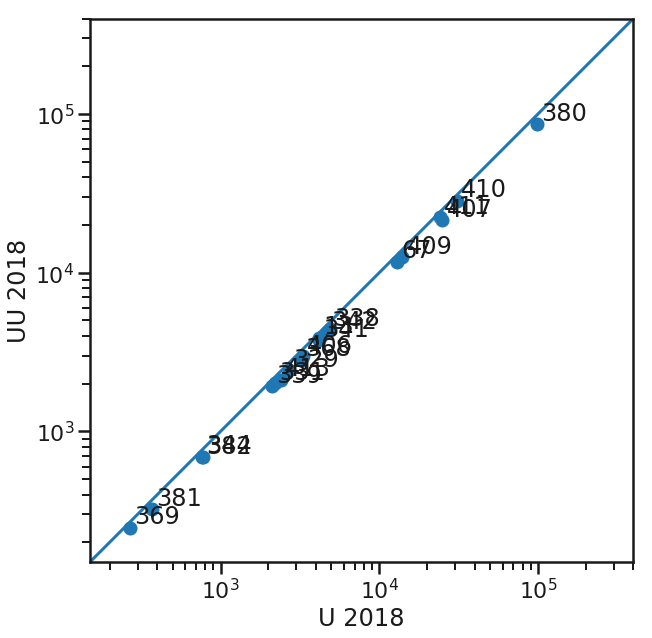

In [42]:
k18tab['UU'] = 14.7*k18tab['Lum.']/k18tab['R_0']**2
ddf = k18tab['ID', 'U', 'UU'].to_pandas()
fig, ax = plt.subplots(figsize=(10, 10))
vmin, vmax = 150, 4e5
ax.scatter(x='U', y='UU', data=ddf)
ax.plot([vmin, vmax], [vmin, vmax])
for id_, x, y in zip(k18tab['ID'], k18tab['U'], k18tab['UU']):
    ax.annotate(
        str(id_), (x, y),
        xytext=(4,4), textcoords='offset points',
               )
ax.set(xscale='log', yscale='log', 
       xlim=[vmin, vmax], ylim=[vmin, vmax],
       xlabel='U 2018', ylabel='UU 2018',
      )
ax.set_aspect('equal')
(ddf['U']/ddf['UU']).describe()

So, it looks like they are using a factor of about 16.3 instead of 14.7, which is odd.  This makes their values about 1.1 times higher than mine.  But apart from that, the U values look fine.

Now, look at the emissivity as a function of $U$, and compare it with the DL07 values.

In [43]:
DL07tab = Table.read('../cloudy-dust-charging/DL07-data/emissivities.fits')

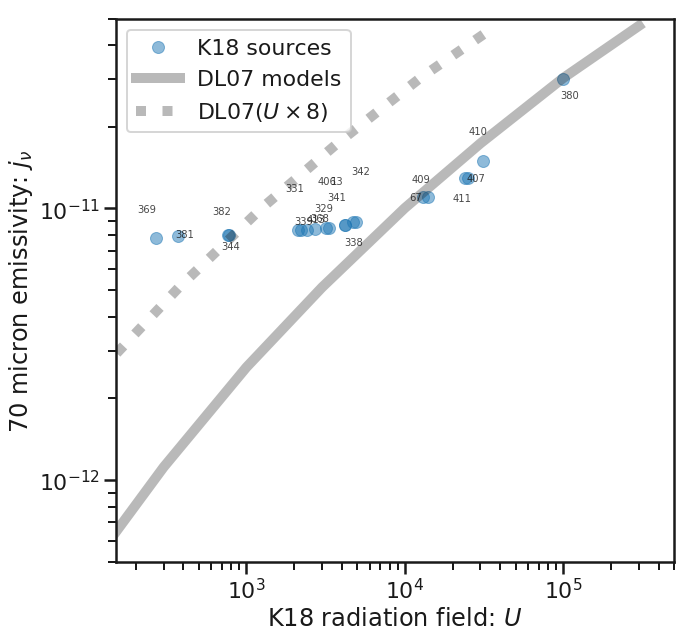

In [74]:
ddf = k18tab['ID', 'U', 'j_nu'].to_pandas()
fig, ax = plt.subplots(figsize=(10, 10))
umin, umax = 150, 5e5
jmin, jmax = 5e-13, 5e-11
ax.plot(k18tab['U'], k18tab['j_nu'], 'o', alpha=0.5, label='K18 sources')
ax.plot(DL07tab['U'], DL07tab['70'], '-', color='k', alpha=0.3, lw=10, label='DL07 models')
ax.plot(DL07tab['U']/8.0, DL07tab['70'], ':', color='k', alpha=0.3, lw=10, label=r'DL07($U \times 8$)')
for i, [id_, x, y] in enumerate(zip(k18tab['ID'], k18tab['U'], k18tab['j_nu'])):
    ax.annotate(
        str(id_), (x, y),
        xytext=(np.random.randint(-10, 10), 35 - 10*(5*i % 7) + np.random.randint(0, 15)), 
        textcoords='offset points', 
        fontsize=10, ha='center', alpha=0.8,
               )
ax.legend()
ax.set(xscale='log', yscale='log', 
       xlim=[umin, umax], 
       ylim=[jmin, jmax],
       xlabel=r'K18 radiation field: $U$', 
       ylabel=r'70 micron emissivity: $j_\nu$',
      )
None

So, they are not even using the emissivities that they say they are using.  But we need to check if it is just a problem with the table, or if they are actuslly using these values to calculate the $\dot M$.  _Yes, they are – see below._

So, we will calculate the $\dot M$ from their table quantities, using their equation (8). 

In [61]:
k18tab['Va'] = 30.0
k18tab['Va'][0] = 26.5
k18tab['Mdot2'] = 1.67e-28*k18tab['R_0,as']**2 * k18tab['D'] * k18tab['Va']**2 * 1e7*k18tab['Peak_70'] / (k18tab['V_inf_{}'] * k18tab['ell'] * k18tab['j_nu'])

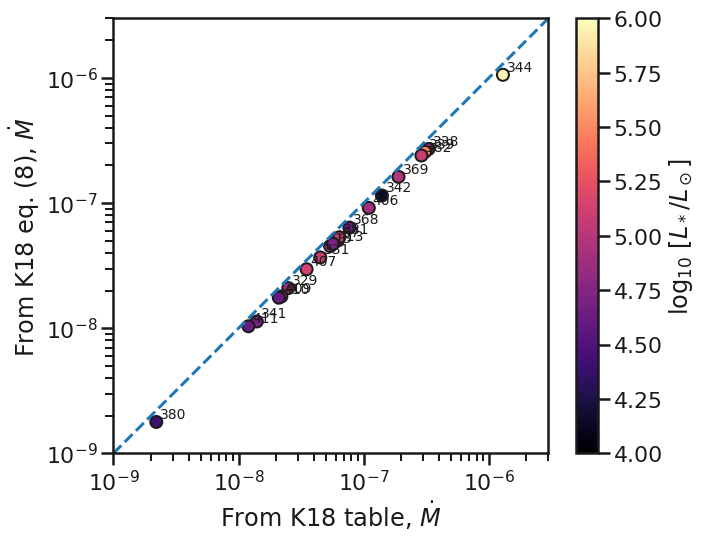

In [62]:
fig, ax = plt.subplots(figsize=(10, 8))
xx, yy = k18tab['Mdot'], k18tab['Mdot2']
c = ax.scatter(xx, yy, 
               c=4.0 + np.log10(k18tab['Lum.']), cmap='magma', vmin=4.0, vmax=6.0, 
               edgecolors='k', alpha=1.0)
fig.colorbar(c, ax=ax).set_label(r'$\log_{10}\ \left[L_* / L_\odot \right]$')
for id_, x, y in zip(k18tab['ID'], xx, yy):
    ax.annotate(
        str(id_), (x, y), fontsize='xx-small',
        xytext=(4,4), textcoords='offset points',
               )
fmin, fmax = 1e-9, 3e-6
ax.plot([fmin, fmax], [fmin, fmax], ls='--')
ax.set(
    xscale='log', yscale='log', 
    xlim=[fmin, fmax], ylim=[fmin, fmax],
    xlabel=r'From K18 table, $\dot M$',
    ylabel=r'From K18 eq. (8), $\dot M$',
)
ax.set_aspect('equal')
fig.savefig('K18-mdot-internal-comparison.pdf')
None

In [72]:
k18tab['Md/Md'] = k18tab['Mdot2']/k18tab['Mdot']
print(f"Ratio of Mdot = {k18tab['Md/Md'].mean():.4f} +/- {k18tab['Md/Md'].std():.4f}")

Ratio of Mdot = 0.8286 +/- 0.0144


So, they do seem to be using the emissivity values from their Table.  Although there is a strange factor of 0.83 appearing from somwhere.

### What the mass loss rates _should_ have been in K18

First, we will use the $j_\nu$ values directly from DL07, which is what they claim they were doing (although they were not, see above).  

In [75]:
k18tab['jnu_dl07'] = np.interp(k18tab['U'], DL07tab['U'], DL07tab['70'])

Check that that worked:

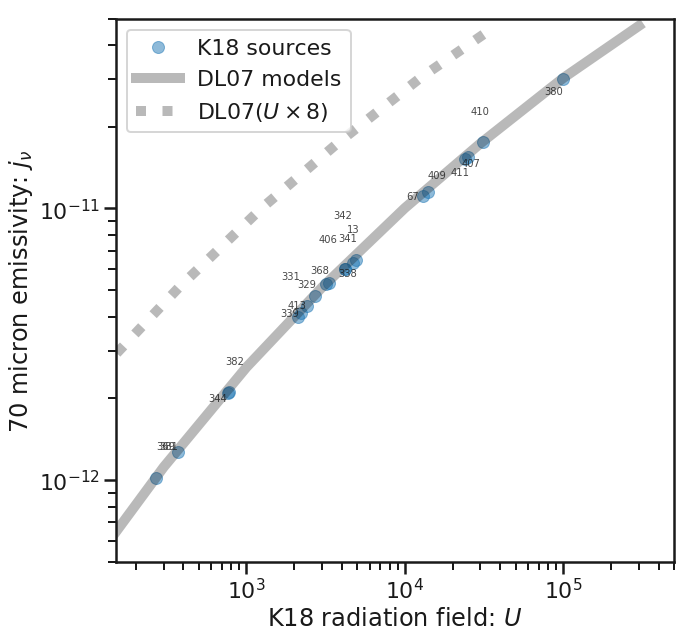

In [77]:
fig, ax = plt.subplots(figsize=(10, 10))
umin, umax = 150, 5e5
jmin, jmax = 5e-13, 5e-11
ax.plot(k18tab['U'], k18tab['jnu_dl07'], 'o', alpha=0.5, label='K18 sources')
ax.plot(DL07tab['U'], DL07tab['70'], '-', color='k', alpha=0.3, lw=10, label='DL07 models')
ax.plot(DL07tab['U']/8.0, DL07tab['70'], ':', color='k', alpha=0.3, lw=10, label=r'DL07($U \times 8$)')
for i, [id_, x, y] in enumerate(zip(k18tab['ID'], k18tab['U'], k18tab['jnu_dl07'])):
    ax.annotate(
        str(id_), (x, y),
        xytext=(np.random.randint(-10, 10), 35 - 10*(5*i % 7) + np.random.randint(0, 15)), 
        textcoords='offset points', 
        fontsize=10, ha='center', alpha=0.8,
               )
ax.legend()
ax.set(xscale='log', yscale='log', 
       xlim=[umin, umax], 
       ylim=[jmin, jmax],
       xlabel=r'K18 radiation field: $U$', 
       ylabel=r'70 micron emissivity: $j_\nu$',
      )
None

In [78]:
k18tab['Mdot3'] = 1.67e-28*k18tab['R_0,as']**2 * k18tab['D'] * k18tab['Va']**2 * 1e7*k18tab['Peak_70'] / (k18tab['V_inf_{}'] * k18tab['ell'] * k18tab['jnu_dl07'])

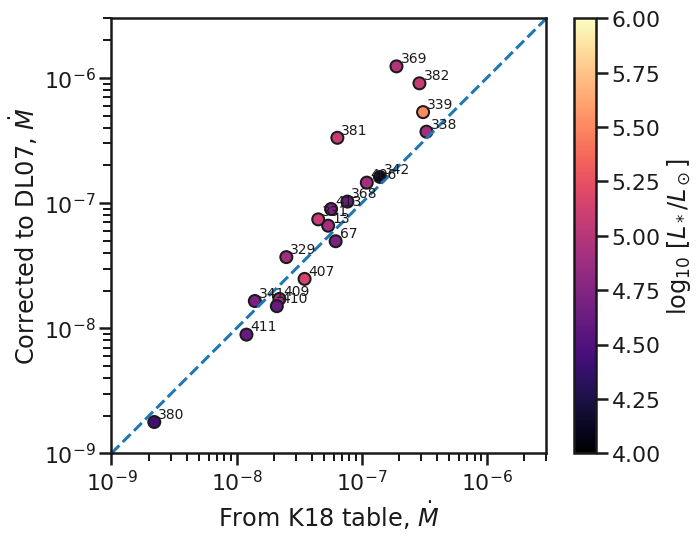

In [79]:
fig, ax = plt.subplots(figsize=(10, 8))
xx, yy = k18tab['Mdot'], k18tab['Mdot3']
c = ax.scatter(xx, yy, 
               c=4.0 + np.log10(k18tab['Lum.']), cmap='magma', vmin=4.0, vmax=6.0, 
               edgecolors='k', alpha=1.0)
fig.colorbar(c, ax=ax).set_label(r'$\log_{10}\ \left[L_* / L_\odot \right]$')
for id_, x, y in zip(k18tab['ID'], xx, yy):
    ax.annotate(
        str(id_), (x, y), fontsize='xx-small',
        xytext=(4,4), textcoords='offset points',
               )
fmin, fmax = 1e-9, 3e-6
ax.plot([fmin, fmax], [fmin, fmax], ls='--')
ax.set(
    xscale='log', yscale='log', 
    xlim=[fmin, fmax], ylim=[fmin, fmax],
    xlabel=r'From K18 table, $\dot M$',
    ylabel=r'Corrected to DL07, $\dot M$',
)
ax.set_aspect('equal')
fig.savefig('K18-mdot-DL07-comparison.pdf')
None

Next, we will correct the emissivities to account for the different SED between O stars and ISRF.  We do this by multiplying $U$ by eight.

In [81]:
k18tab['jnu_Ux8'] = np.interp(8*k18tab['U'], DL07tab['U'], DL07tab['70'])
k18tab['Mdot4'] = 1.67e-28*k18tab['R_0,as']**2 * k18tab['D'] * k18tab['Va']**2 * 1e7*k18tab['Peak_70'] / (k18tab['V_inf_{}'] * k18tab['ell'] * k18tab['jnu_Ux8'])

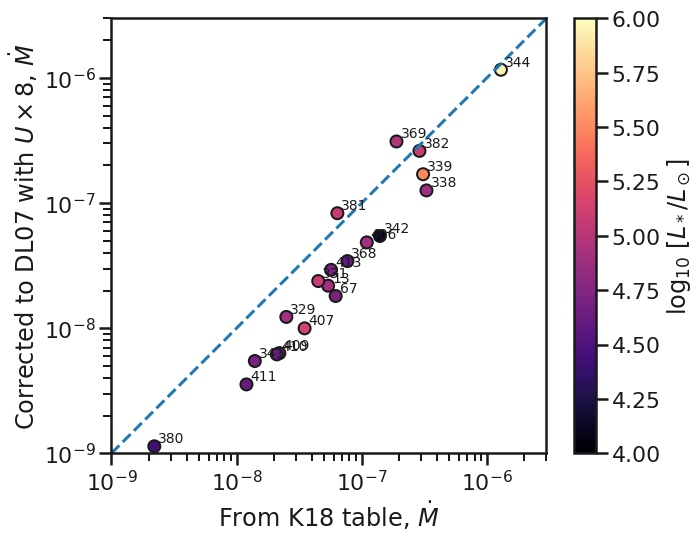

In [82]:
fig, ax = plt.subplots(figsize=(10, 8))
xx, yy = k18tab['Mdot'], k18tab['Mdot4']
c = ax.scatter(xx, yy, 
               c=4.0 + np.log10(k18tab['Lum.']), cmap='magma', vmin=4.0, vmax=6.0, 
               edgecolors='k', alpha=1.0)
fig.colorbar(c, ax=ax).set_label(r'$\log_{10}\ \left[L_* / L_\odot \right]$')
for id_, x, y in zip(k18tab['ID'], xx, yy):
    ax.annotate(
        str(id_), (x, y), fontsize='xx-small',
        xytext=(4,4), textcoords='offset points',
               )
fmin, fmax = 1e-9, 3e-6
ax.plot([fmin, fmax], [fmin, fmax], ls='--')
ax.set(
    xscale='log', yscale='log', 
    xlim=[fmin, fmax], ylim=[fmin, fmax],
    xlabel=r'From K18 table, $\dot M$',
    ylabel=r'Corrected to DL07 with $U \times 8$, $\dot M$',
)
ax.set_aspect('equal')
fig.savefig('K18-mdot-Ux8-comparison.pdf')
None

### Comparison between my mass loss and the K18 corrected values

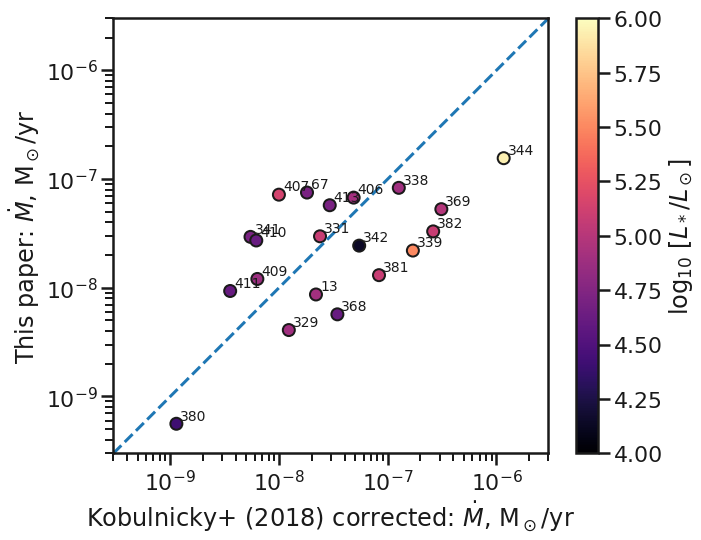

In [108]:
fig, ax = plt.subplots(figsize=(10, 8))
xx, yy = k18tab['Mdot4'], ttt['Md']
c = ax.scatter(xx, yy, 
               c=4.0 + np.log10(tt['L4']), cmap='magma', vmin=4.0, vmax=6.0, 
               edgecolors='k', alpha=1.0)
fig.colorbar(c, ax=ax).set_label(r'$\log_{10}\ \left[L_* / L_\odot \right]$')
for id_, x, y in zip(tt['ID'], xx, yy):
    ax.annotate(
        str(id_), (x, y), fontsize='xx-small',
        xytext=(4,4), textcoords='offset points',
               )
fmin, fmax = 3e-10, 3e-6
ax.plot([fmin, fmax], [fmin, fmax], ls='--')
ax.set(
    xscale='log', yscale='log', 
    xlim=[fmin, fmax], ylim=[fmin, fmax],
    xlabel=r'Kobulnicky+ (2018) corrected: $\dot M$, M$_\odot$/yr',
    ylabel=r'This paper: $\dot M$, M$_\odot$/yr',
)
ax.set_aspect('equal')
fig.savefig('K18-mdot-corrected-comparison.pdf')
None

In [119]:
k18tab['Mdot_will'] = ttt['Md']
k18tab['Md_Md'] = k18tab['Mdot_will'] / k18tab['Mdot4']
k18tab['LIR'] = ttt['LIR_will']

In [120]:
k18tab['Mdot4', 'Mdot_will', 'Md_Md', 'Lum.', 'R_0', 'U', 'Peak_70', 'LIR'].to_pandas().applymap(np.log10).corr()

,Mdot4,Mdot_will,Md_Md,Lum.,R_0,U,Peak_70,LIR
Mdot4,1.000000,0.604043,-0.666453,0.640163,0.864248,-0.829355,-0.078891,0.435332
Mdot_will,0.604043,1.000000,0.191599,0.451033,0.470381,-0.392570,0.186334,0.876671
Md_Md,-0.666453,0.191599,1.000000,-0.366442,-0.624310,0.654131,0.271472,0.283999
Lum.,0.640163,0.451033,-0.366442,1.000000,0.784444,-0.509917,-0.089024,0.646779
R_0,0.864248,0.470381,-0.624310,0.784444,1.000000,-0.933444,-0.459811,0.370235
U,-0.829355,-0.392570,0.654131,-0.509917,-0.933444,1.000000,0.584818,-0.140771
Peak_70,-0.078891,0.186334,0.271472,-0.089024,-0.459811,0.584818,1.000000,0.360218
LIR,0.435332,0.876671,0.283999,0.646779,0.370235,-0.140771,0.360218,1.000000


In [113]:
k18tab['Mdot4', 'Mdot_will'].to_pandas().applymap(np.log10).describe()

,Mdot4,Mdot_will
count,20.000000,20.000000
mean,-7.517398,-7.650679
std,0.744145,0.565268
min,-8.944322,-9.251647
25%,-8.050732,-7.947313
50%,-7.578397,-7.549178
75%,-7.035093,-7.224059
max,-5.933676,-6.808841


In [146]:
['Sub-Giant' if 'IV' in s else 'Dwarf' if 'V' in s else 'Giant' for s in k18tab['Sp.T._1']]

['Sub-Giant',
 'Dwarf',
 'Dwarf',
 'Dwarf',
 'Dwarf',
 'Dwarf',
 'Dwarf',
 'Dwarf',
 'Giant',
 'Dwarf',
 'Dwarf',
 'Sub-Giant',
 'Dwarf',
 'Giant',
 'Sub-Giant',
 'Giant',
 'Sub-Giant',
 'Dwarf',
 'Dwarf',
 'Dwarf']

In [147]:
k18tab['Lum Class'] = ['Sub-Giant' if 'IV' in s else 'Dwarf' if 'V' in s else 'Giant' for s in k18tab['Sp.T._1']]

In [162]:
k18tab['ell,pc'] = k18tab['ell']*k18tab['R_0']/k18tab['R_0,as']
k18tab['ell/R0'] = k18tab['ell']/k18tab['R_0,as']

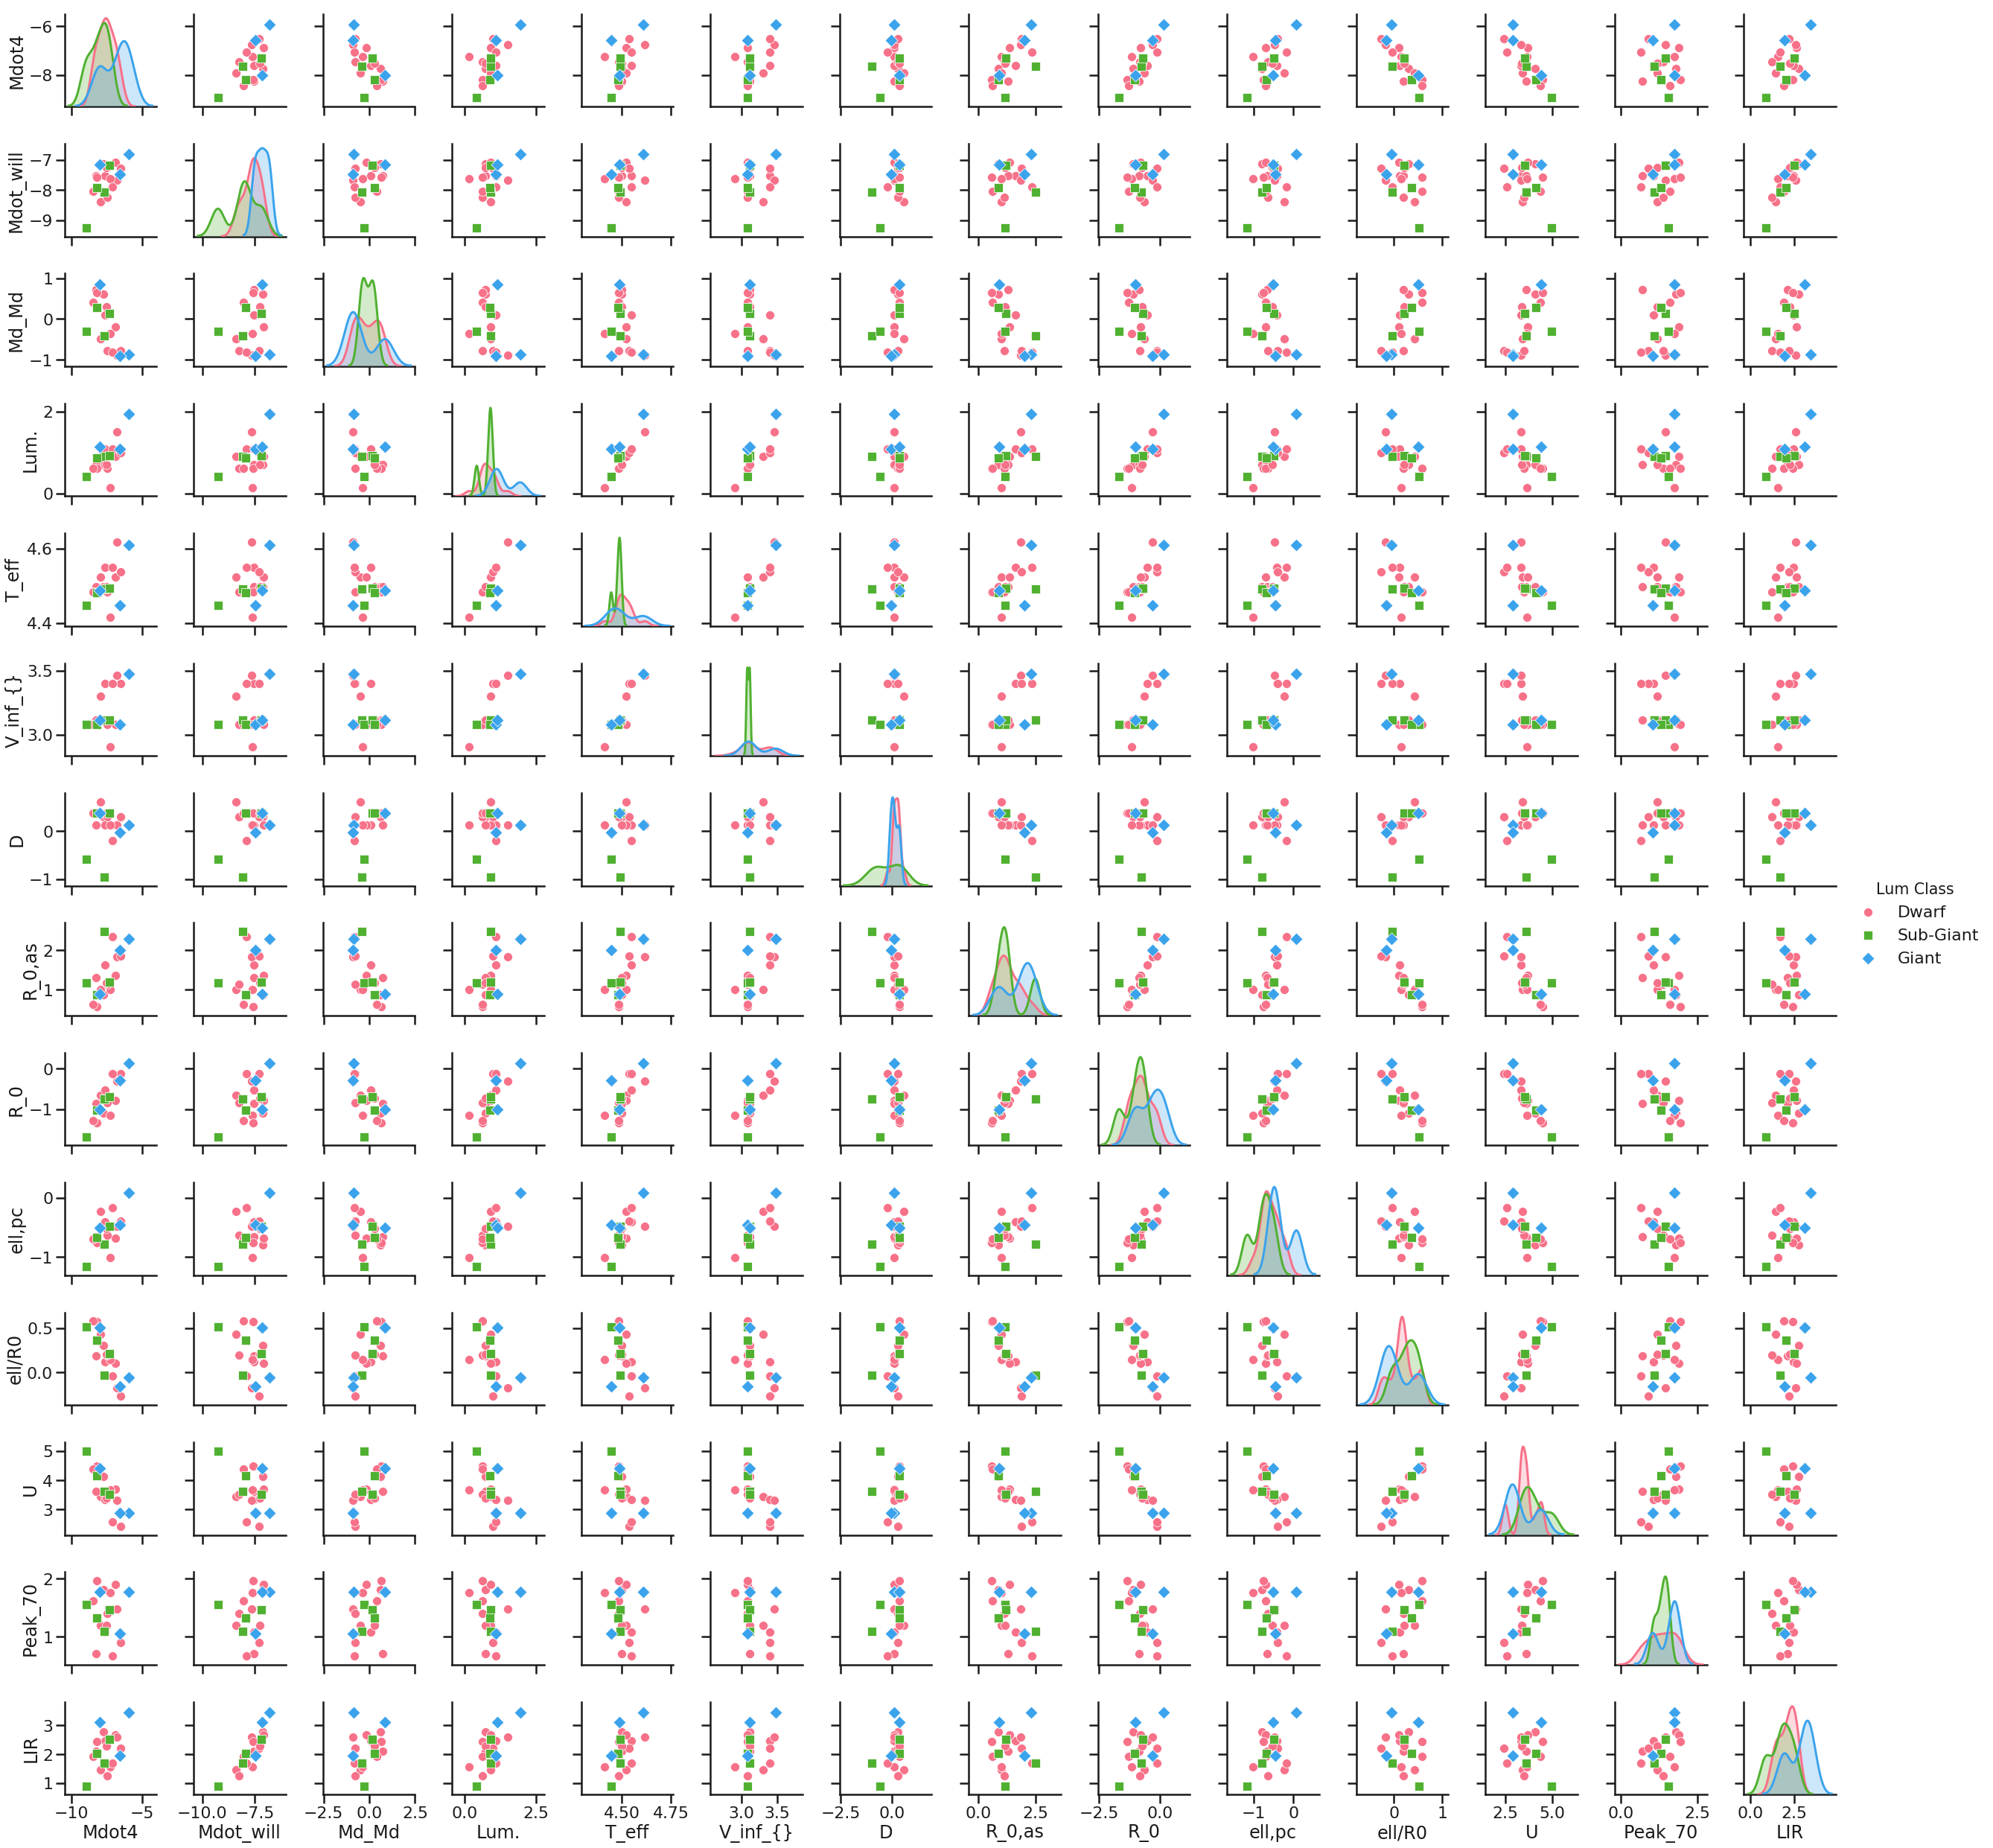

In [169]:
ldf = k18tab['Mdot4', 'Mdot_will', 'Md_Md', 'Lum.', 'T_eff', 'V_inf_{}',
             'D', 'R_0,as', 'R_0', 'ell,pc', 'ell/R0', 
             'U', 'Peak_70', 'LIR'].to_pandas().applymap(np.log10)
ldf['Lum Class'] = k18tab['Lum Class']
sns.pairplot(ldf, hue='Lum Class', hue_order=['Dwarf', 'Sub-Giant', 'Giant'], 
             palette='husl', markers=["o", "s", "D"],
             diag_kind='kde', diag_kws=dict(bw='silverman'))

In [170]:
ldf.corr()

,Mdot4,Mdot_will,Md_Md,Lum.,T_eff,V_inf_{},D,"R_0,as",R_0,"ell,pc",ell/R0,U,Peak_70,LIR
Mdot4,1.000000,0.604043,-0.666453,0.640163,0.526888,0.507777,0.034725,0.663961,0.864248,0.629307,-0.842867,-0.829355,-0.078891,0.435332
Mdot_will,0.604043,1.000000,0.191599,0.451033,0.334757,0.173297,0.392073,0.127086,0.470381,0.437020,-0.354637,-0.392570,0.186334,0.876671
Md_Md,-0.666453,0.191599,1.000000,-0.366442,-0.335716,-0.463225,0.324019,-0.698802,-0.624310,-0.366181,0.706258,0.654131,0.271472,0.283999
Lum.,0.640163,0.451033,-0.366442,1.000000,0.830358,0.787473,0.017973,0.610557,0.784444,0.810195,-0.501769,-0.509917,-0.089024,0.646779
T_eff,0.526888,0.334757,-0.335716,0.830358,1.000000,0.911257,0.098370,0.496849,0.704643,0.722864,-0.456133,-0.499745,-0.123837,0.529030
V_inf_{},0.507777,0.173297,-0.463225,0.787473,0.911257,1.000000,0.026754,0.588921,0.764178,0.771989,-0.507833,-0.605876,-0.340612,0.337302
D,0.034725,0.392073,0.324019,0.017973,0.098370,0.026754,1.000000,-0.609259,0.024385,0.309654,0.297760,-0.022926,0.234231,0.353206
"R_0,as",0.663961,0.127086,-0.698802,0.610557,0.496849,0.588921,-0.609259,1.000000,0.777871,0.488481,-0.844471,-0.726235,-0.511653,0.071709
R_0,0.864248,0.470381,-0.624310,0.784444,0.704643,0.764178,0.024385,0.777871,1.000000,0.861256,-0.828642,-0.933444,-0.459811,0.370235
"ell,pc",0.629307,0.437020,-0.366181,0.810195,0.722864,0.771989,0.309654,0.488481,0.861256,1.000000,-0.429211,-0.724592,-0.322340,0.458930


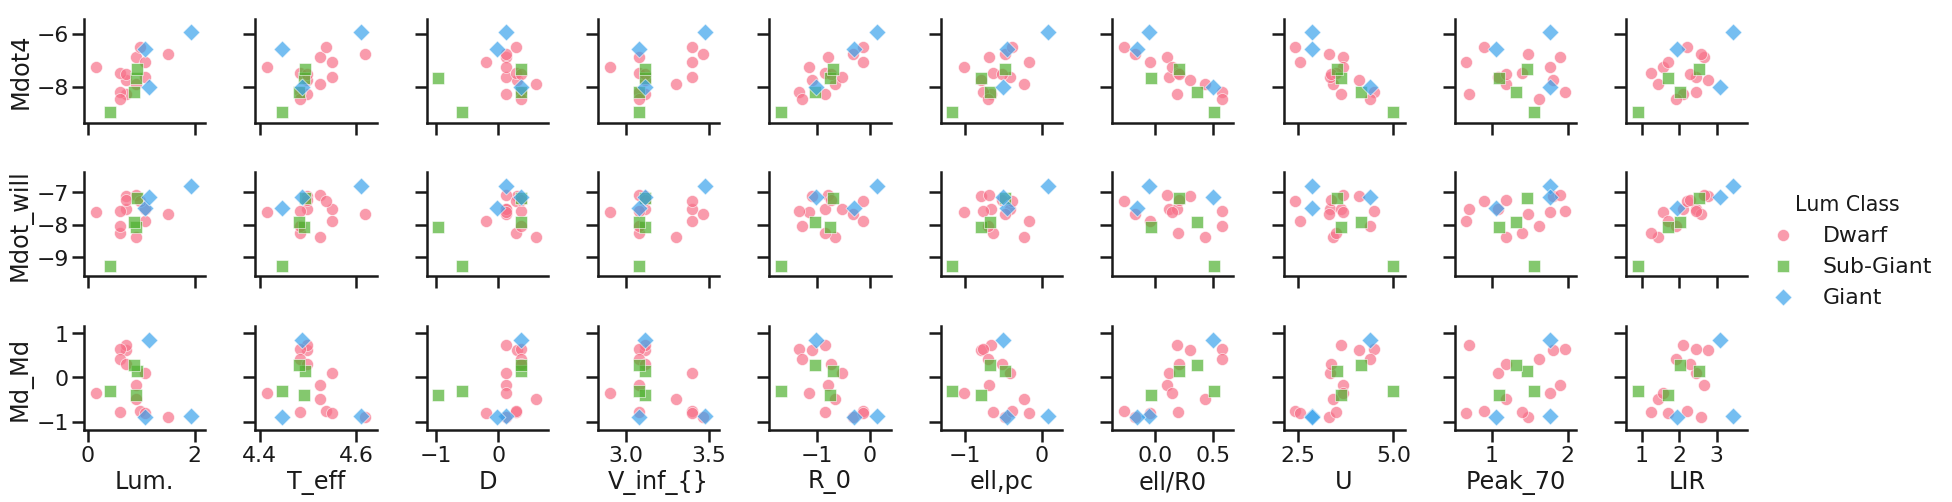

In [171]:
sns.pairplot(ldf, hue='Lum Class', hue_order=['Dwarf', 'Sub-Giant', 'Giant'], 
             palette='husl', markers=["o", "s", "D"],
             x_vars=['Lum.', 'T_eff', 'D', 'V_inf_{}', 'R_0', 'ell,pc', 'ell/R0', 'U', 'Peak_70', 'LIR'],
             y_vars=['Mdot4', 'Mdot_will', 'Md_Md'],
             plot_kws=dict(alpha=0.7))

This shows that 

1. The K18 (corrected) mass loss rates are very well correlated with the bow physical size $R_0$ ($r = 0.86$) and negatively correlated with radiation field $U$ ($r = -0.83$).  It is not clear which of these is the driving factor, since they are very well correlated between themselves ($r = -0.93$).  It would be good if they were correlated with $U$, since there is the prospect of estimating $U$ in a distance-independant manner, using 70/24 flux ratio. They are also equally well negatively correlated with the relative path length $\ell/R_0$ ($r = -0.84$), even though they are weakly positively correlated with $\ell$ itself. 

2. My mass loss rates are very well correlated with the shell luminosity $L_{\mathrm{IR}}$ ($r = 0.88$), as we already knew.

3. The ratio Me/K18 is best correlated with angular size of bow ($r = -0.70$), so for poorly resolved objects, I get a higher $\dot M$ than K18, whereas for best resolved objects I get a lower $\dot M$ than K18.  This is probably not due to underestimating the peak brightness for small objects, as one might think, since `Peak_70` has a slight tendency to _fall_ with `R_0,as` ($r = -0.51$). 

## Mass loss versus luminosity

Finally, we do the plots for my values and the corrected K18 ones.

O star models from Krticka & Kubat (2017)

In [290]:
def Mdot_Krticka18(L):
    return 10**(-5.69 + 1.63*np.log10(L/1e6))

B star models from Krticka (2014)

In [295]:
Lum_Krt14 = 10**np.array([4.39, 4.20, 3.99, 3.77, 3.54, 3.30, 3.03, 2.75, 2.43])
Mdot_Krt14 = 1.e-11*np.array([210, 160, 96, 39, 7.9, 3.4, 0.91, 0.072, 0.0])

Weak wind observations from Marcolino (2009)

In [299]:
Lum_M09 = 10**np.array([4.73, 4.74, 4.96, 4.86, 4.79])
Mdot_M09 = 10**np.array([-9.35, -9.22, -8.92, -8.80, -9.22])

In [302]:
MarVink_I = Table.read('data/Mdot_tables/martins-vink-O-I.fits')
MarVink_III = Table.read('data/Mdot_tables/martins-vink-O-III.fits')
MarVink_V = Table.read('data/Mdot_tables/martins-vink-O-V.fits')

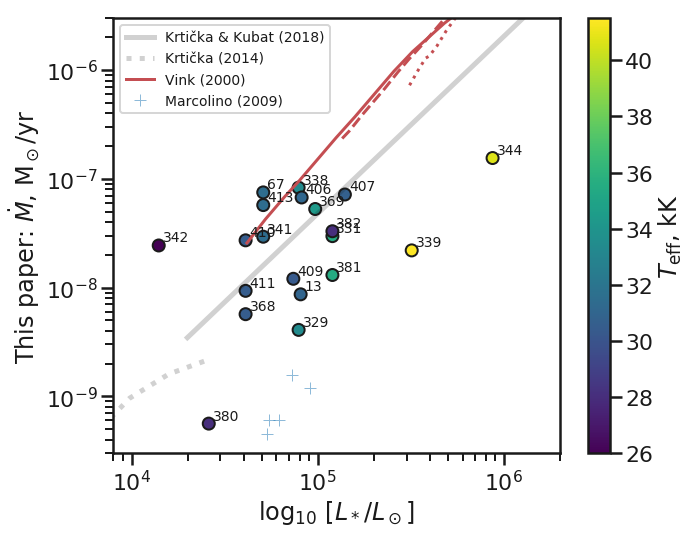

In [314]:
fig, ax = plt.subplots(figsize=(10, 8))
xx, yy = 1e4*k18tab['Lum.'], k18tab['Mdot_will']
c = ax.scatter(xx, yy, 
               c=1.e-3*k18tab['T_eff'], cmap='viridis', #vmin=4.0, vmax=6.0, 
               edgecolors='k', alpha=1.0, label='_nolabel_')
fig.colorbar(c, ax=ax).set_label(r'$T_{\mathrm{eff}}$, kK')
for id_, x, y in zip(tt['ID'], xx, yy):
    ax.annotate(
        str(id_), (x, y), fontsize='xx-small',
        xytext=(4,4), textcoords='offset points',
               )
xmin, xmax = 8e3, 2e6
ymin, ymax = 3e-10, 3e-6
xgrid = np.logspace(4.3, np.log10(xmax))
ax.plot(xgrid, Mdot_Krticka18(xgrid), ls='-', color='k', alpha=0.2, lw=5.0, label='Krtička & Kubat (2018)')
ax.plot(Lum_Krt14, Mdot_Krt14, ls=':', color='k', alpha=0.2, lw=5.0, label='Krtička (2014)')

ax.plot(10**MarVink_V['log L'], 10**MarVink_V['Mdot'], ls='-', color='r', label='Vink (2000)')
ax.plot(10**MarVink_III['log L'], 10**MarVink_III['Mdot'], ls='--', color='r', label='_nolabel_')
ax.plot(10**MarVink_I['log L'], 10**MarVink_I['Mdot'], ls=':', color='r', label='_nolabel_')

ax.plot(Lum_M09, Mdot_M09, '+', alpha=0.5, label='Marcolino (2009)')

ax.legend(fontsize='xx-small')
ax.set(
    xscale='log', yscale='log', 
    xlim=[xmin, xmax], ylim=[ymin, ymax],
    xlabel=r'$\log_{10}\ \left[L_* / L_\odot \right]$',
    ylabel=r'This paper: $\dot M$, M$_\odot$/yr',
)
fig.savefig('Mdot-from-eta-vs-luminosity.pdf')
None

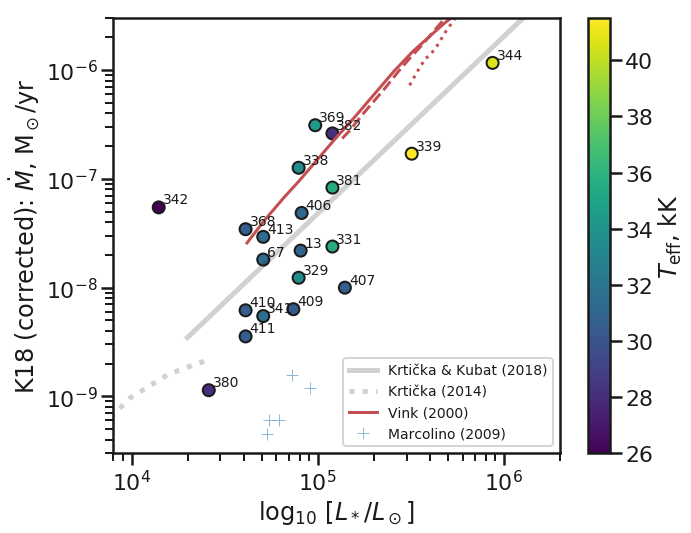

In [313]:
fig, ax = plt.subplots(figsize=(10, 8))
xx, yy = 1e4*k18tab['Lum.'], k18tab['Mdot4']
c = ax.scatter(xx, yy, 
               c=1.e-3*k18tab['T_eff'], cmap='viridis', #vmin=4.0, vmax=6.0, 
               edgecolors='k', alpha=1.0, label='_nolabel_')
fig.colorbar(c, ax=ax).set_label(r'$T_{\mathrm{eff}}$, kK')
for id_, x, y in zip(tt['ID'], xx, yy):
    ax.annotate(
        str(id_), (x, y), fontsize='xx-small',
        xytext=(4,4), textcoords='offset points',
               )
xmin, xmax = 8e3, 2e6
ymin, ymax = 3e-10, 3e-6
xgrid = np.logspace(4.3, np.log10(xmax))
ax.plot(xgrid, Mdot_Krticka18(xgrid), ls='-', color='k', alpha=0.2, lw=5.0, label='Krtička & Kubat (2018)')
ax.plot(Lum_Krt14, Mdot_Krt14, ls=':', color='k', alpha=0.2, lw=5.0, label='Krtička (2014)')

ax.plot(10**MarVink_V['log L'], 10**MarVink_V['Mdot'], ls='-', color='r', label='Vink (2000)')
ax.plot(10**MarVink_III['log L'], 10**MarVink_III['Mdot'], ls='--', color='r', label='_nolabel_')
ax.plot(10**MarVink_I['log L'], 10**MarVink_I['Mdot'], ls=':', color='r', label='_nolabel_')

ax.plot(Lum_M09, Mdot_M09, '+', alpha=0.5, label='Marcolino (2009)')

ax.legend(fontsize='xx-small', loc='lower right')
ax.set(
    xscale='log', yscale='log', 
    xlim=[xmin, xmax], ylim=[ymin, ymax],
    xlabel=r'$\log_{10}\ \left[L_* / L_\odot \right]$',
    ylabel=r'K18 (corrected): $\dot M$, M$_\odot$/yr',
)
fig.savefig('Mdot-K18-corrected-vs-luminosity.pdf')
None

### More details on K18 table

Next, get a general overview of their tables.

In [173]:
pd.options.display.max_columns = None
k18df = k18tab.to_pandas()
k18df.describe()

,ID,T_eff,R_*,Mass,V_inf_{},D,"R_0,as",R_0,Peak_70,ell,Lum.,U,j_nu,n_a,Mdot,UU,Mdot2,Va,Md/Md,jnu_dl07,Mdot3,jnu_Ux8,Mdot4,Mdot_will,Md_Md,LIR,"ell,pc",ell/R0
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01,20.000000,2.000000e+01,20.000000,2.000000e+01,20.000000,20.000000,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,20.000000,20.000000,20.000000,20.000000
mean,339.000000,32275.000000,9.580000,22.000000,1620.000000,1.697500,57.580000,0.292200,33.775000,58.350000,12.490000,12103.500000,1.051000e-11,24.320000,1.580100e-07,10784.842360,1.301964e-07,29.825000,0.828558,7.998058e-12,4.124915e-07,2.051421e-11,1.196379e-07,3.906117e-08,1.671922,366.368312,0.330164,1.799715
std,106.921516,3842.268382,3.114922,10.228958,670.113894,0.908862,83.719158,0.332831,26.115994,71.688122,18.700827,22389.255006,5.018796e-12,35.453255,2.877074e-07,19668.658968,2.350375e-07,0.782624,0.014751,7.081368e-12,9.173548e-07,1.289963e-11,2.612836e-07,3.770853e-08,2.056275,642.081973,0.253428,1.040643
min,13.000000,26000.000000,6.000000,10.000000,800.000000,0.110000,3.700000,0.021000,4.600000,14.000000,1.400000,270.000000,7.800000e-12,1.200000,2.200000e-09,247.517276,1.779445e-09,26.500000,0.808371,1.020665e-12,1.777878e-09,4.068180e-12,1.136783e-09,5.602133e-10,0.125928,7.863365,0.068600,0.534247
25%,338.750000,30500.000000,7.625000,16.000000,1200.000000,1.320000,9.450000,0.089750,12.225000,20.750000,4.850000,2175.000000,8.300000e-12,8.400000,2.425000e-08,1993.851224,2.017303e-08,30.000000,0.817429,4.087087e-12,2.286990e-08,1.274840e-11,9.059374e-09,1.135589e-08,0.168540,49.505537,0.192085,0.922089
50%,368.500000,31300.000000,8.700000,19.500000,1300.000000,1.635000,15.500000,0.168500,27.000000,28.000000,7.900000,3750.000000,8.600000e-12,16.000000,5.950000e-08,3377.263295,4.872925e-08,30.000000,0.828557,5.653393e-12,8.195318e-08,1.703163e-11,2.653947e-08,2.825784e-08,0.574386,144.227851,0.265114,1.560714
75%,406.250000,33650.000000,10.000000,23.250000,2125.000000,2.350000,70.750000,0.345250,57.900000,50.500000,12.000000,13250.000000,1.100000e-11,21.000000,1.525000e-07,11929.841013,1.268416e-07,30.000000,0.835565,1.122950e-11,3.427526e-07,3.071250e-11,9.387581e-08,5.984526e-08,2.126019,349.317064,0.359925,2.397973
max,413.000000,41500.000000,19.000000,58.000000,3000.000000,4.100000,299.000000,1.359000,91.400000,277.000000,87.000000,99000.000000,3.000000e-11,160.000000,1.300000e-06,86666.666667,1.061414e-06,30.000000,0.863272,3.002643e-11,4.051531e-06,4.696000e-11,1.164994e-06,1.552956e-07,7.191473,2804.786776,1.197047,3.809524


In [64]:
k18df.corr()

,ID,T_eff,R_*,Mass,V_inf_{},D,"R_0,as",R_0,Peak_70,ell,Lum.,U,j_nu,n_a,Mdot,UU,Mdot2,Va
ID,1.000000,-0.030312,0.053303,0.002743,0.032541,0.307345,-0.460667,0.076878,-0.003643,-0.483304,0.019960,0.138243,0.129623,-0.007417,0.021531,0.138464,0.022487,0.717652
T_eff,-0.030312,1.000000,0.466757,0.869105,0.915160,-0.015362,0.368403,0.705306,-0.075719,0.312275,0.719625,-0.371722,-0.370687,-0.329357,0.582961,-0.373422,0.584276,0.078106
R_*,0.053303,0.466757,1.000000,0.780164,0.467679,-0.133743,0.464169,0.717606,0.002698,0.407103,0.815858,-0.242243,-0.248345,-0.271894,0.761965,-0.248489,0.762698,-0.031737
Mass,0.002743,0.869105,0.780164,1.000000,0.823884,-0.108244,0.462367,0.862230,0.037552,0.412414,0.954709,-0.283695,-0.284703,-0.234009,0.869905,-0.288352,0.870374,0.069032
V_inf_{},0.032541,0.915160,0.467679,0.823884,1.000000,-0.066541,0.430384,0.801745,-0.264501,0.365666,0.672880,-0.307122,-0.306635,-0.343330,0.525674,-0.310869,0.528004,0.112399
D,0.307345,-0.015362,-0.133743,-0.108244,-0.066541,1.000000,-0.594345,-0.210772,0.122603,-0.600234,-0.128313,-0.209138,-0.211310,-0.123996,-0.175323,-0.204287,-0.175646,0.411128
"R_0,as",-0.460667,0.368403,0.464169,0.462367,0.430384,-0.594345,1.000000,0.593896,-0.306738,0.982380,0.438667,-0.270028,-0.270119,-0.238541,0.393725,-0.272813,0.394745,-0.678750
R_0,0.076878,0.705306,0.717606,0.862230,0.801745,-0.210772,0.593896,1.000000,-0.175201,0.501671,0.830766,-0.374175,-0.373590,-0.177389,0.815645,-0.378674,0.817997,0.082883
Peak_70,-0.003643,-0.075719,0.002698,0.037552,-0.264501,0.122603,-0.306738,-0.175201,1.000000,-0.285034,0.144238,0.261193,0.267776,0.478675,0.243739,0.268363,0.241295,0.193548
ell,-0.483304,0.312275,0.407103,0.412414,0.365666,-0.600234,0.982380,0.501671,-0.285034,1.000000,0.396074,-0.167966,-0.168677,-0.264511,0.332881,-0.170945,0.332799,-0.717900


A few intersting nuggets from the correlation matrix:

1. `ell` and `R_0,as` are very well correlated ($r = 0.982$).  See correlation plot below.  This can maybe be used to estimate H/R
2. But we should have logged the quantities first, which I have now done - see plot.  *Anyway, leave this for later*

In [48]:
(k18df['ell']/k18df['R_0,as']).describe()

count    20.000000
mean      1.799715
std       1.040643
min       0.534247
25%       0.922089
50%       1.560714
75%       2.397973
max       3.809524
dtype: float64

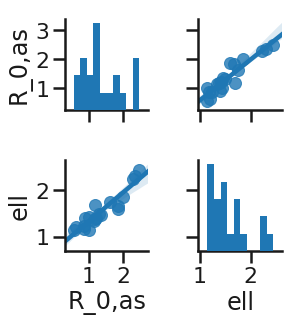

In [49]:
ldf = k18df[['R_0,as', 'ell']].applymap(np.log10)
sns.pairplot(ldf, kind='reg')

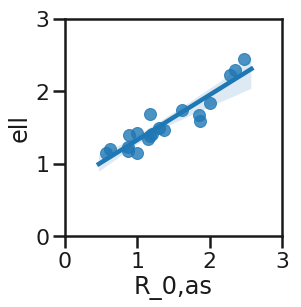

In [50]:
g = sns.regplot('R_0,as', 'ell', data=ldf)
g.set(xlim=[0.0, 3.0], ylim=[0.0, 3.0])
g.set_aspect('equal')

## Looking at 24/70 ratio

In [228]:
tab05_01_02['F70/F2x'] = tab05_01_02['F70']/tab05_01_02['F24 or 22']
tab05_01_02['U18'] = k18tab['U']

In [236]:
def loggify(x):
    try:
        return np.log10(x)
    except:
        return x


In [237]:
df050102 = tab05_01_02['U', 'U18', 
                       'F8 or 12', 'F24 or 22', 'F70', 'F160', 
                       'F70/F2x', 'T2x/70', 'FIR', 'FIR_will',
                       'Observatory'
                      ].to_pandas().applymap(loggify)

/Users/will/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()


In [238]:
df050102

,U,U18,F8 or 12,F24 or 22,F70,F160,F70/F2x,T2x/70,FIR,FIR_will,Observatory
0,5.230449,3.623249,1.710287,2.536268,2.392169,1.789228,-0.144099,2.198657,-7.193820,-7.097444,WISE
1,4.204120,4.113943,-0.508638,1.441836,0.644439,NaN,-0.797398,2.850033,-7.236572,-8.325621,SST
2,4.662758,3.431364,NaN,NaN,NaN,NaN,NaN,NaN,-9.292430,-9.292430,None
3,3.863323,3.342423,NaN,1.454082,1.104487,NaN,-0.349595,2.290035,-8.275724,-8.283596,SST
4,3.579784,3.690196,0.071514,1.516535,1.745309,NaN,0.228774,2.041393,-8.161151,-8.076959,SST
5,3.414973,3.322219,NaN,1.492984,1.609594,NaN,0.116611,2.079181,-8.221849,-8.146554,SST
6,2.672098,3.623249,NaN,1.028124,1.078457,NaN,0.050333,2.100371,-8.721246,-8.622559,SST
7,3.278754,3.672098,-0.416801,-0.111821,0.953760,0.720159,1.065580,1.845098,-9.221849,-9.171282,SST
8,2.959041,2.880814,1.256140,2.149601,2.683227,2.129690,0.533626,1.991226,-7.301030,-7.288187,WISE
9,3.568202,3.505150,-1.244125,-0.425969,0.143015,NaN,0.568984,1.982271,-9.853872,-9.839922,WISE


In [239]:
df050102.corr()

,U,U18,F8 or 12,F24 or 22,F70,F160,F70/F2x,T2x/70,FIR,FIR_will
U,1.000000,0.729240,0.199723,0.201206,-0.118088,0.420446,-0.446285,0.335912,0.042683,0.042370
U18,0.729240,1.000000,-0.005720,0.000841,-0.399962,0.092639,-0.535197,0.405502,-0.094534,-0.122307
F8 or 12,0.199723,-0.005720,1.000000,0.830095,0.745589,0.935697,-0.183040,0.047144,0.709722,0.862476
F24 or 22,0.201206,0.000841,0.830095,1.000000,0.741506,0.942698,-0.444491,0.343445,0.920606,0.966986
F70,-0.118088,-0.399962,0.745589,0.741506,1.000000,0.989228,0.271430,-0.310791,0.721240,0.873433
F160,0.420446,0.092639,0.935697,0.942698,0.989228,1.000000,-0.738919,0.698158,0.962610,0.959803
F70/F2x,-0.446285,-0.535197,-0.183040,-0.444491,0.271430,-0.738919,1.000000,-0.907604,-0.357660,-0.220998
T2x/70,0.335912,0.405502,0.047144,0.343445,-0.310791,0.698158,-0.907604,1.000000,0.427409,0.162313
FIR,0.042683,-0.094534,0.709722,0.920606,0.721240,0.962610,-0.357660,0.427409,1.000000,0.933237
FIR_will,0.042370,-0.122307,0.862476,0.966986,0.873433,0.959803,-0.220998,0.162313,0.933237,1.000000


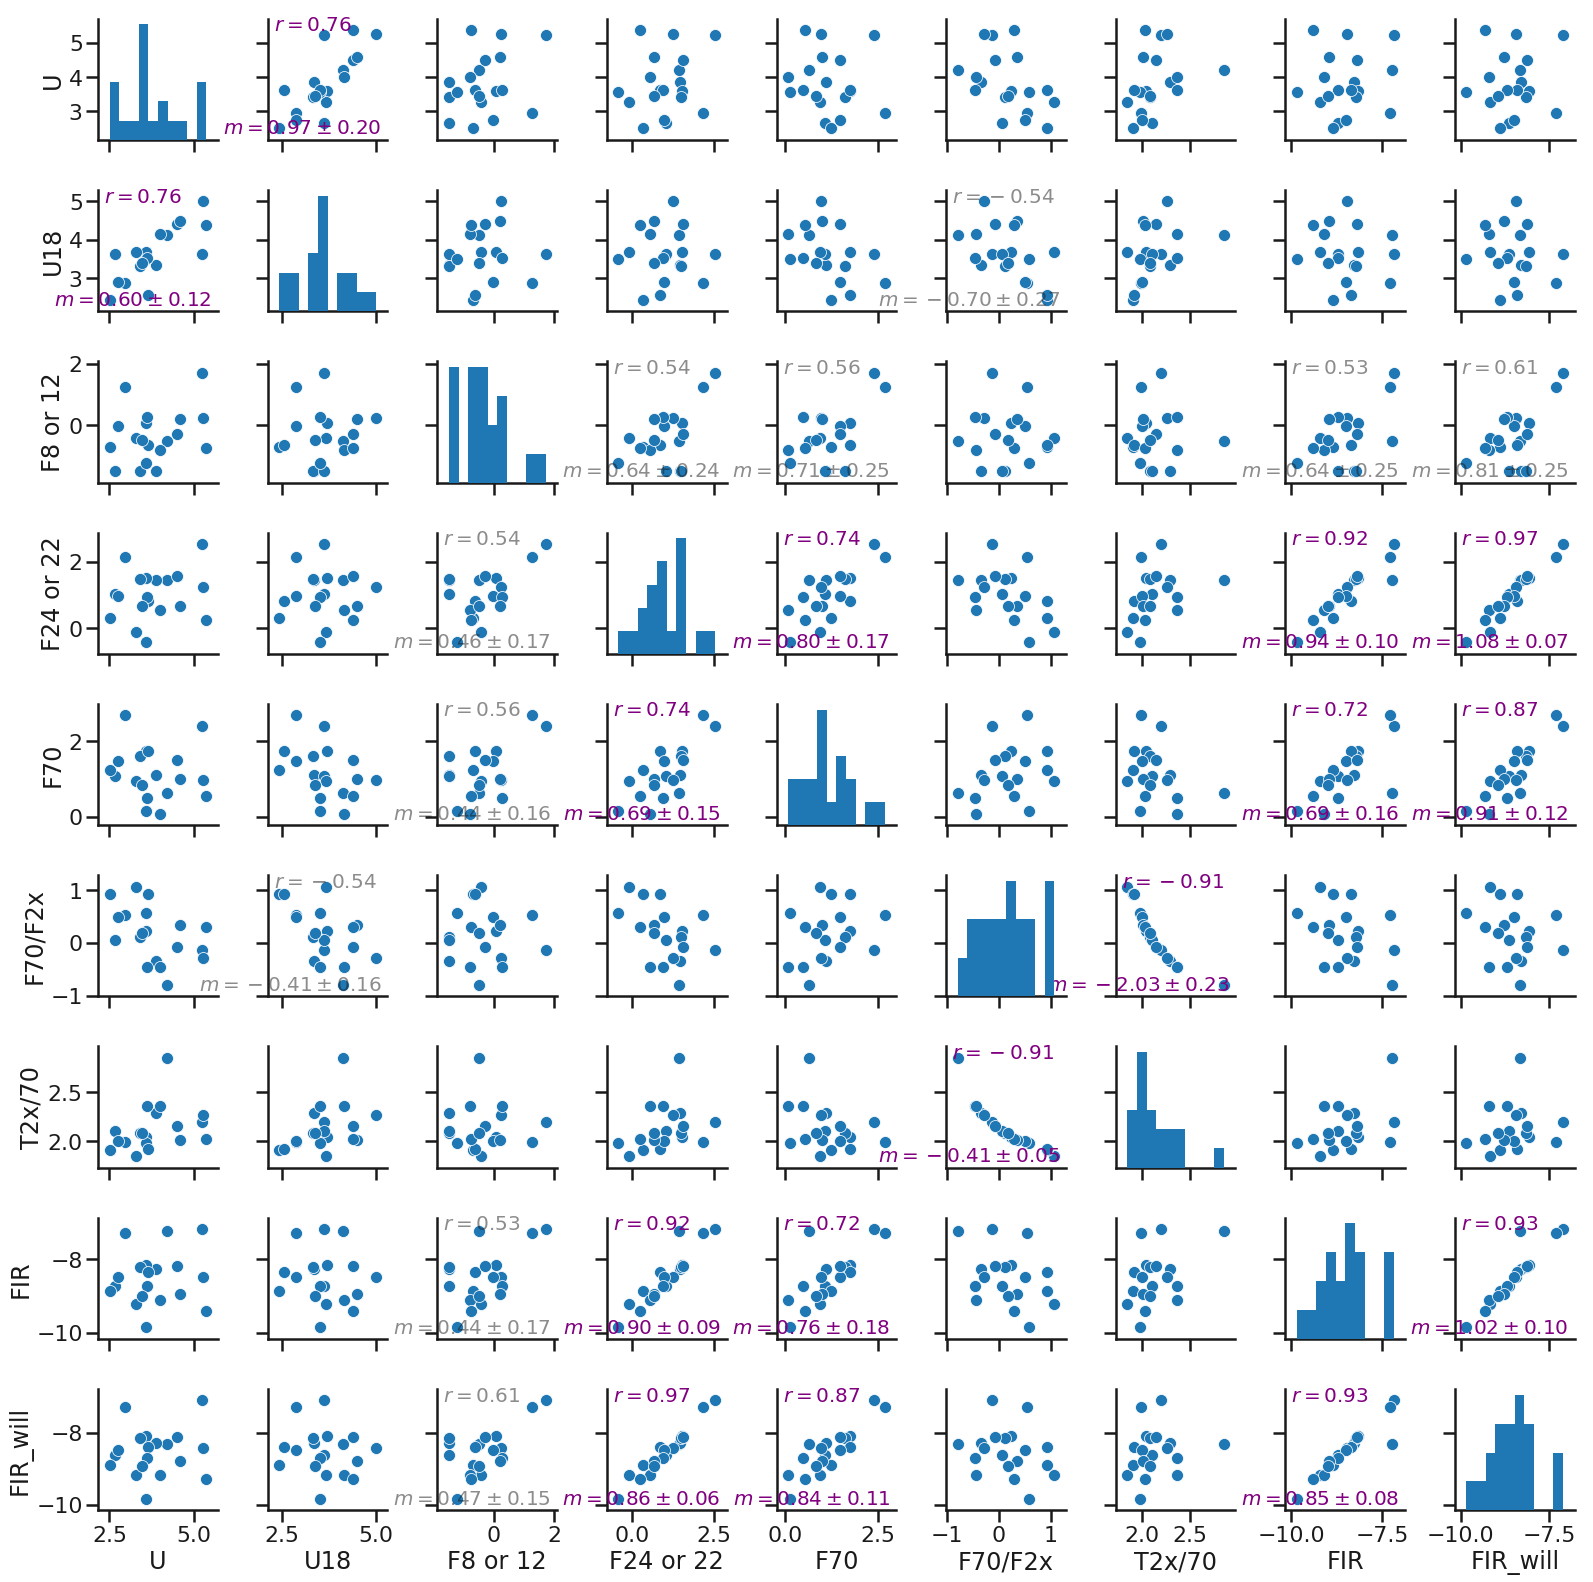

In [244]:
g = sns.pairplot(df050102.drop(2).drop('F160', axis=1).fillna(-1.5))
g.map_offdiag(corrfunc)

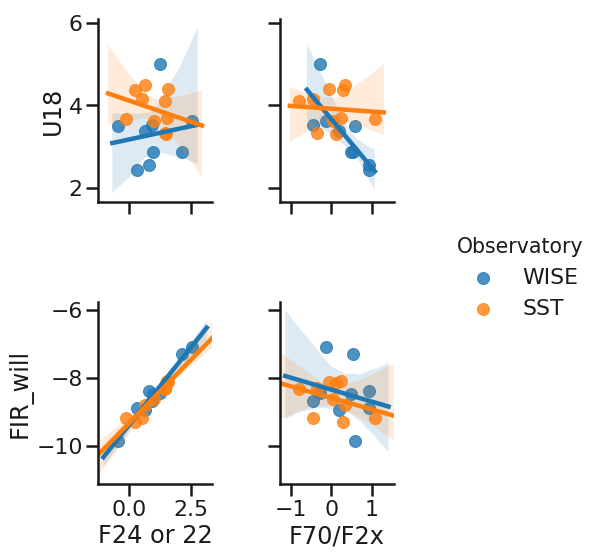

In [261]:
g = sns.pairplot(df050102.drop(2).fillna(-1.5), 
                 x_vars=['F24 or 22', 'F70/F2x'],
                 y_vars=['U18', 'FIR_will'],
                 hue='Observatory',
                 kind='reg'
                )
plt.gcf().set_size_inches(10, 10)

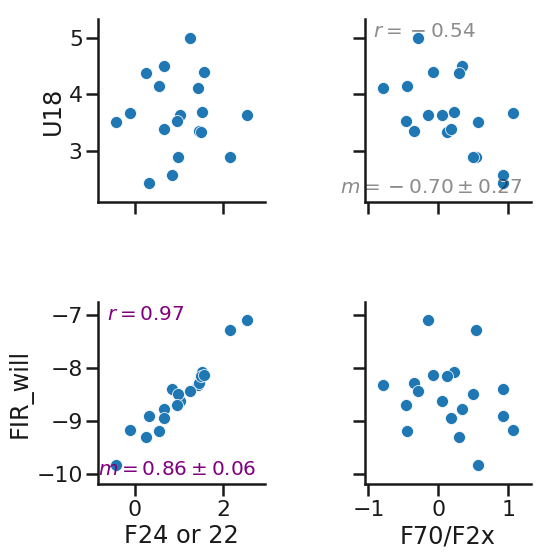

In [258]:
g = sns.pairplot(df050102.drop(2).fillna(-1.5), 
                 x_vars=['F24 or 22', 'F70/F2x'],
                 y_vars=['U18', 'FIR_will'],
                )
g.map_offdiag(corrfunc)
plt.gcf().set_size_inches(10, 10)

**Conclusions**: 

1. The radiation field $U$ is not as well correlated with `F70/F2x` as we might wish. We have $r = -0.54$, meaning only 30% of the variance in $U$ can be predicted by knowing the flux ratio.  On the other hand, the mean relation is exactly what we expect from the Cloudy models - see `grain-jratios-vs-U.pdf`.  Strangely, the correlation is much better for just the WISE sources, but there are too few points to draw any conclusions.

2. The total FIR flux is very well correlated with the 24 micron value ($r = 0.97$), better than at 70 ($r = 0.87$) or 8 micron ($r = 0.61$ from pairplot, but this is affected by missing values - really should be $0.86$, see `.corr()` matrix above).

### Earlier stuff

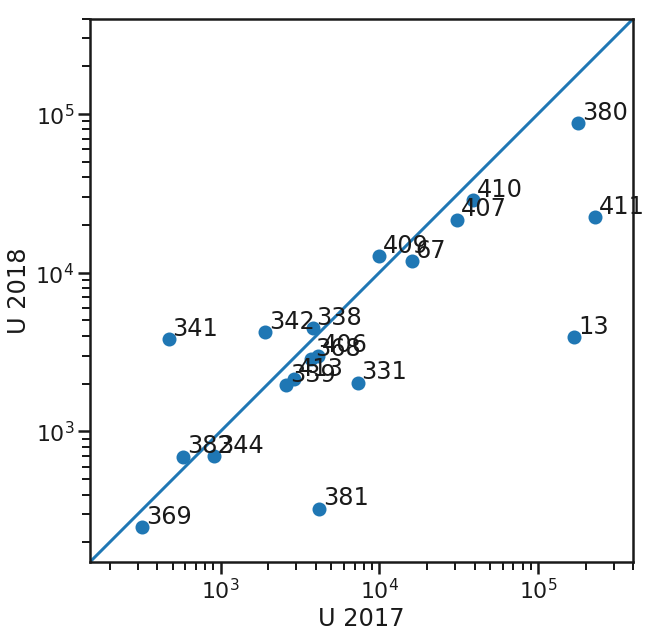

In [51]:
ttt['G'] = 0.074*200*ttt['L4']/ttt['R0']**2
ddf = ttt['ID', 'U', 'G'].to_pandas()
fig, ax = plt.subplots(figsize=(10, 10))
vmin, vmax = 150, 4e5
ax.scatter(x='U', y='G', data=ddf)
ax.plot([vmin, vmax], [vmin, vmax])
for id_, x, y in zip(ttt['ID'], ttt['U'], ttt['G']):
    ax.annotate(
        str(id_), (x, y),
        xytext=(4,4), textcoords='offset points',
               )
ax.set(xscale='log', yscale='log', 
       xlim=[vmin, vmax], ylim=[vmin, vmax],
       xlabel='U 2017', ylabel='U 2018',
      )
ax.set_aspect('equal')

In [52]:
ddf['log U/U'] = np.log10(ddf.U/ddf.G)
ddf.describe()

,ID,U,G,log U/U
count,19.000000,19.000000,19.000000,19.000000
mean,339.526316,37298.947368,11301.387297,0.225101
std,109.824794,71000.442009,20242.935338,0.552781
min,13.000000,320.000000,249.201067,-0.907296
25%,340.000000,2250.000000,1987.802649,0.019762
50%,369.000000,4100.000000,3796.589709,0.132468
75%,406.500000,23500.000000,12228.242788,0.235950
max,413.000000,230000.000000,87256.235828,1.637778


So this seems to be a discrepancy between their U column and their new luminosities. So maybe I shouldn't worry about it.

In [53]:
from astropy.table import QTable
ltab = QTable(tt['ID', 'Teff', 'R*', 'L4'], masked=False)
ltab['L2017'] = (4*np.pi*ltab['R*']**2 * const.sigma_sb*ltab['Teff']**4).to(u.Lsun)
ltab['L4'] = ltab['L4']*1e4*u.Lsun
ltab

ID,Teff,R*,L4,L2017
,K,solRad,solLum,solLum
int64,float64,float64,float64,float64
13,31000.0,7.2,81000.0,43132.52455543753
67,31500.0,7.7,51000.0,52591.64746203363
331,35500.0,9.3,120000.0,123757.75409452198
338,31500.0,7.7,79000.0,52591.64746203363
339,41500.0,11.1,320000.0,329254.2992268516
341,20900.0,5.4,51000.0,5012.631444422643
342,20900.0,5.4,14000.0,5012.631444422643
344,40700.0,19.0,870000.0,892437.7833740469


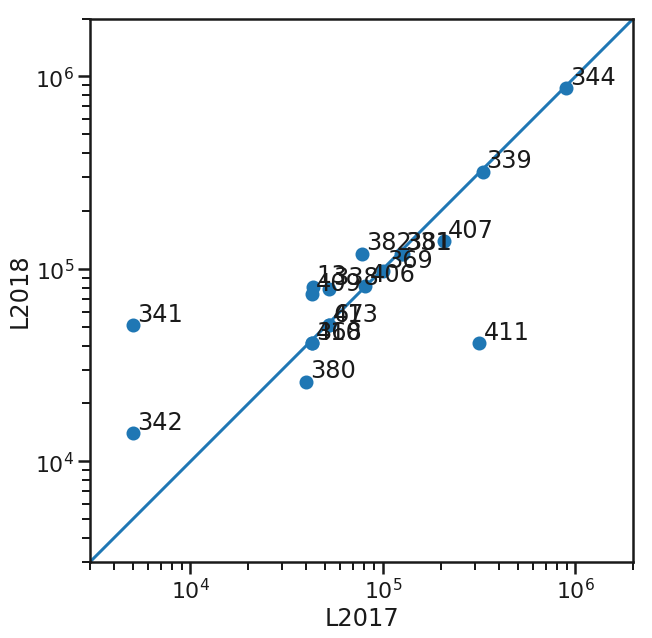

In [54]:
fig, ax = plt.subplots(figsize=(10, 10))
vmin, vmax = 3e3, 2e6
ax.scatter(ltab['L2017'], ltab['L4'])
for id_, x, y in zip(ltab['ID'], ltab['L2017'].data, ltab['L4'].data):
    ax.annotate(
        str(id_), (x, y),
        xytext=(4,4), textcoords='offset points',
               )
ax.plot([vmin, vmax], [vmin, vmax])
ax.set(xscale='log', yscale='log', 
       xlim=[vmin, vmax], ylim=[vmin, vmax],
       xlabel='L2017', ylabel='L2018',
      )
ax.set_aspect('equal')

Not the same!  But doesn't fully explain the $U$ scatter.  Must be different radii too

In [289]:
a = np.linspace(0.0, 1.0, 11)
b = a**2
np.savetxt("test4jane.dat", np.stack((a, b), axis=1), fmt='%.4e')
!cat test4jane.dat

0.0000e+00 0.0000e+00
1.0000e-01 1.0000e-02
2.0000e-01 4.0000e-02
3.0000e-01 9.0000e-02
4.0000e-01 1.6000e-01
5.0000e-01 2.5000e-01
6.0000e-01 3.6000e-01
7.0000e-01 4.9000e-01
8.0000e-01 6.4000e-01
9.0000e-01 8.1000e-01
1.0000e+00 1.0000e+00
